# Binary Classification of Target Variable Using Logistic Regression with 124 Features

# Problem Statement

We need to:
- Train a logistic regression model on data.csv to predict the probability of the target variable being 1.
- Evaluate the model's performance using key metrics such as ROC-AUC, F1-score, and Gini coefficient.
- Group the predictions by probability intervals and analyze the distribution of class 1 instances.
- Use the trained model to predict probabilities on an unseen dataset (verify.csv) and save the predictions.

# Download the Data

In [1]:
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
extraction_directory = 'Test assignments/Logistic Regression test assignment'
train_csv_path = extraction_directory + '/data.csv'
data_df = pd.read_csv(train_csv_path, sep=';')

# Exploratory Data Analysis

## Overview

In [3]:
# Lets drop ID column
data_df = data_df.drop(columns=['ID'])

In [4]:
data_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,target
0,1,0,0,1381,63,0,0,1,0,0,0,1,0,0,0,0,229,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25000,10330,20330,35000,...,0,1,0,0,1,0,19,24,956,4,50.0,345,0.069565,0.692252,0,13,0,0.0,4,0.0,1,39,0,2.0,20,0.05,61.0,0.0,23.0,100.0,0.610000,0,4,0.210526,0,0,0,0.000000,0,0,0,0,0,0.0,7000,4000,7526.3157,12000,0.583333,0
1,0,0,0,1809,33,1,0,1,0,0,1,0,0,0,0,0,67,2,0.7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,22000,25000,25000,55000,...,0,1,0,0,1,0,61,4,407,1,6.0,24,0.166667,0.224986,0,1,0,0.0,1,0.0,0,2,0,0.0,1,0.00,0.0,0.0,23.0,208.0,0.000000,1,5,0.081967,0,0,0,0.000000,0,0,0,0,0,0.0,10000,1000,8393.4426,30000,0.333333,0
2,0,0,0,1804,29,0,1,0,0,0,1,0,0,0,0,0,185,0,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,5000,30000,40000,40000,...,0,1,0,0,1,0,54,3,1178,1,21.0,123,0.024390,0.652993,0,20,0,0.0,8,0.0,0,18,0,0.0,5,0.00,16.0,0.0,11.0,115.0,0.139130,0,3,0.055556,0,5,5,0.092593,0,1,0,0,0,0.0,3000,1000,3425.9259,15000,0.200000,0
3,0,0,0,1560,28,1,1,0,0,0,0,1,0,0,0,0,252,1,5.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,10000,25000,25000,25000,...,0,1,0,0,1,0,75,8,623,0,8.0,37,0.216216,0.399359,0,4,0,0.0,1,0.0,0,16,0,0.0,3,0.00,5.0,1.0,12.0,116.0,0.043103,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,2000,1000,1946.6666,3000,0.666667,0
4,0,0,0,258,33,1,0,0,0,1,0,1,0,0,0,0,4,2,0.1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,10000,17000,25400,25400,...,0,1,1,0,0,0,9,10,77,1,8.0,18,0.555556,0.298450,0,2,0,0.0,1,0.0,0,0,0,0.0,0,1.00,1.0,1.0,4.0,14.0,0.071429,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,2000,2000,4444.4444,8000,0.250000,0


In [5]:
data_df.describe(include='all')

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,target
count,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,2.558200e+05,...,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,218025.000000,218025.000000,218025.000000,218025.000000,213927.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000
mean,0.356731,0.147756,0.002564,819.453049,41.053213,0.412751,0.355516,0.372434,0.063498,0.141439,0.252834,0.560292,0.141787,0.035908,0.005692,0.183387,135.139758,0.507169,3.290838,0.003287,0.010605,0.008901,0.150469,0.014792,0.088445,0.254484,0.000160,0.209214,0.021906,0.596498,0.169416,0.001560,0.223610,0.145157,0.009225,0.046419,0.001177,0.154918,0.121417,0.065366,0.006317,0.372195,0.143816,0.020233,0.051388,0.013060,9128.381995,24710.608467,29409.935494,4.191040e+04,...,0.001040,0.850962,0.088152,0.007716,0.893273,0.205203,15.799453,26.475092,255.822543,8.725084,22.538871,61.842858,0.534262,0.445382,0.485662,4.113451,0.028141,0.116559,1.396075,0.618092,0.546709,7.480690,0.106278,0.376401,2.619748,0.485240,59.992574,17.457980,59.184222,241.548387,0.352597,0.079591,1.055602,0.061278,0.083438,0.434470,0.432582,0.064746,0.082175,0.227687,0.015581,0.026964,0.035990,0.005929,7201.150125,2866.290818,5904.254582,12100.793241,0.659698,0.197444
std,0.479035,0.354859,0.050574,772.966593,13.754019,0.492330,0.478670,0.483454,0.243857,0.348475,0.434637,0.496352,0.348832,0.186061,0.075227,0.386984,110.063157,0.772278,5.010320,0.057242,0.102434,0.093923,0.357531,0.120718,0.283942,0.435571,0.012659,0.406748,0.146377,0.490601,0.375120,0.039462,0.416665,0.352259,0.095604,0.210392,0.034282,0.361827,0.326612,0.247172,0.079228,0.483391,0.350904,0.140797,0.220788,0.113532,6889.862296,11193.427808,12102.403580,2.639693e+04,...,0.032229,0.356127,0.283516,0.087503,0.30876

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255820 entries, 0 to 255819
Columns: 125 entries, feature_1 to target
dtypes: float64(21), int64(104)
memory usage: 244.0 MB


We have more than 250 000 rows of data to work with - Great!

## Detecting different Data Type columns

In [7]:
data_df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

there are 2 unique data types - integer and float.  
We need to check if there are any no pre-encoded categorical values. We can do this by checking the unqie values in each column - if there are any columns that only have 0 and 1 then we can assume that they are pre-encoded, and it help us in better understanding of features

In [8]:
# Detect numerical columns on data_df
numeric_columns = data_df.select_dtypes(include = ['float64', 'int64']).columns
numeric_columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_116', 'feature_117', 'feature_118', 'feature_119',
       'feature_120', 'feature_121', 'feature_122', 'feature_123',
       'feature_124', 'target'],
      dtype='object', length=125)

In [9]:
# create an empty list to store binary categorical columns is there are any
binary_categorical_columns = []

# Check for binary categorical columns
for col in numeric_columns:
    unique_values = data_df[col].unique()
    # Check if the unique values are only 0 and 1
    if set(unique_values) <= {0, 1} and len(unique_values) <= 2:
        binary_categorical_columns.append(col)

binary_categorical_columns

['feature_1',
 'feature_2',
 'feature_3',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_51',
 'feature_52',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'feature_67',
 'feature_68',
 'feature_69',
 'feature_70',
 'feature_71',
 'feature_72',
 'feature_73',
 'feature_74',
 'feature_75',
 'feature_76',
 'feature_77',
 'feature_78',
 'feature_79',
 '

So there are a lot of columns that we can consider as binary categorical.  
Okay, lets keep it in mind and move on

In [10]:
# now we can create a list of true numeric columns that are not only contain o and 1
true_numeric_columns = [col for col in numeric_columns if col not in binary_categorical_columns]
true_numeric_columns

['feature_4',
 'feature_5',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_82',
 'feature_83',
 'feature_84',
 'feature_85',
 'feature_86',
 'feature_87',
 'feature_88',
 'feature_89',
 'feature_90',
 'feature_91',
 'feature_92',
 'feature_93',
 'feature_94',
 'feature_95',
 'feature_96',
 'feature_97',
 'feature_98',
 'feature_99',
 'feature_100',
 'feature_101',
 'feature_102',
 'feature_103',
 'feature_104',
 'feature_105',
 'feature_106',
 'feature_108',
 'feature_109',
 'feature_110',
 'feature_111',
 'feature_112',
 'feature_113',
 'feature_118',
 'feature_119',
 'feature_120',
 'feature_121',
 'feature_122',
 'feature_123',
 'feature_124']

It is also possible that there also non-binary categorical columns (which can have more than two unique values). Since we cant precisely identify them in our list of true numeric columns, we will not do anything about it - this will not interfere with our analysis

## Detecting Null and Zero (0) values

In [11]:
# Count the number of nulls in each column
null_counts = data_df.isnull().sum()

# Filter to show only columns with null values
columns_with_nulls = null_counts[null_counts > 0]

print(columns_with_nulls)
print("total number of columns with nulls: {}".format(len(columns_with_nulls)))

feature_102    37795
feature_103    37795
feature_104    37795
feature_105    37795
feature_106    41893
dtype: int64
total number of columns with nulls: 5


and we have only 5 columns with nulls. Later we need to prepare this data before training the model

In [12]:
# lets also count the number of 0 values, since it can differ from null values
zero_counts = (data_df == 0).sum()
columns_with_zero = zero_counts[zero_counts > 0]
print(columns_with_zero)
print("total number of columns with 0: {}".format(len(columns_with_zero)))

feature_1      164561
feature_2      218021
feature_3      255164
feature_4         249
feature_6      150230
                ...  
feature_116    251834
feature_117    248922
feature_118    248922
feature_119    248922
target         205310
Length: 118, dtype: int64
total number of columns with 0: 118


Here we have 118 columns containing '0' values. This number differs from number of columns with missing values (5).  
Since we dont know what features 1 to 124 are, we assume that its ok for these 118 columns to have zeros, and previous 5 columns with null values need to be treated as missing values

## Numeric Data Distribution

In [13]:
# make a df of only numerical columns for visualization
numeric_df = data_df[true_numeric_columns]
numeric_df

,feature_4,feature_5,feature_17,feature_18,feature_19,feature_47,feature_48,feature_49,feature_50,feature_53,feature_54,feature_55,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
0,1381,63,229,0,0.0,25000,10330,20330,35000,0.0,140.0,0.020000,19,24,956,4,50.0,345,0.069565,0.692252,0,13,0,0.0,4,0.0,1,39,0,2.0,20,0.05,61.0,0.0,23.0,100.0,0.610000,4,0.210526,0,0,0,0.000000,0,0.0,7000,4000,7526.3157,12000,0.583333
1,1809,33,67,2,0.7,22000,25000,25000,55000,0.0,0.0,0.000000,61,4,407,1,6.0,24,0.166667,0.224986,0,1,0,0.0,1,0.0,0,2,0,0.0,1,0.00,0.0,0.0,23.0,208.0,0.000000,5,0.081967,0,0,0,0.000000,0,0.0,10000,1000,8393.4426,30000,0.333333
2,1804,29,185,0,3.0,5000,30000,40000,40000,0.0,0.0,0.000000,54,3,1178,1,21.0,123,0.024390,0.652993,0,20,0,0.0,8,0.0,0,18,0,0.0,5,0.00,16.0,0.0,11.0,115.0,0.139130,3,0.055556,0,5,5,0.092593,0,0.0,3000,1000,3425.9259,15000,0.200000
3,1560,28,252,1,5.0,10000,25000,25000,25000,0.0,0.0,0.000000,75,8,623,0,8.0,37,0.216216,0.399359,0,4,0,0.0,1,0.0,0,16,0,0.0,3,0.00,5.0,1.0,12.0,116.0,0.043103,0,0.000000,0,0,0,0.000000,0,0.0,2000,1000,1946.6666,3000,0.666667
4,258,33,4,2,0.1,10000,17000,25400,25400,0.0,0.0,0.000000,9,10,77,1,8.0,18,0.555556,0.298450,0,2,0,0.0,1,0.0,0,0,0,0.0,0,1.00,1.0,1.0,4.0,14.0,0.071429,0,0.000000,0,0,0,0.000000,0,0.0,2000,2000,4444.4444,8000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255815,2,30,175,0,0.7,6500,18000,18000,18000,0.0,60.0,0.030000,1,2,2,2,2.0,2,1.000000,1.000000,0,0,0,0.0,0,1.0,0,0,0,0.0,0,1.00,NaN,NaN,NaN,NaN,NaN,0,0.000000,0,0,0,0.000000,0,0.0,2000,2000,2000.0000,2000,1.000000
255816,501,29,49,0,1.5,10000,15000,20000,20000,0.0,0.0,0.000000,19,3,184,2,9.0,42,0.071429,0.367265,0,17,0,0.0,8,0.0,0,3,0,0.0,1,0.00,26.0,0.0,17.0,83.0,0.313253,1,0.052632,0,0,0,0.000000,0,0.0,3000,1000,5157.8947,22000,0.136364
255817,99,64,72,0,0.0,10000,13000,43000,50000,0.0,800.0,0.137931,3,39,51,3,17.0,39,1.000000,0.515152,0,0,0,0.0,0,1.0,1,1,0,0.0,1,1.00,21.0,21.0,24.0,27.0,0.777778,0,0.000000,0,0,0,0.000000,0,0.0,5800,2400,4333.3333,5800,1.000000
255818,43,33,211,0,1.6,5000,25000,35000,55000,0.0,0.0,0.000000,2,10,20,10,10.0,10,1.000000,0.465116,0,0,0,0.0,0,1.0,0,0,0,0.0,0,1.00,23.0,23.0,23.0,23.0,1.000000,0,0.000000,0,0,0,0.000000,0,0.0,2000,2000,6000.0000,10000,0.200000


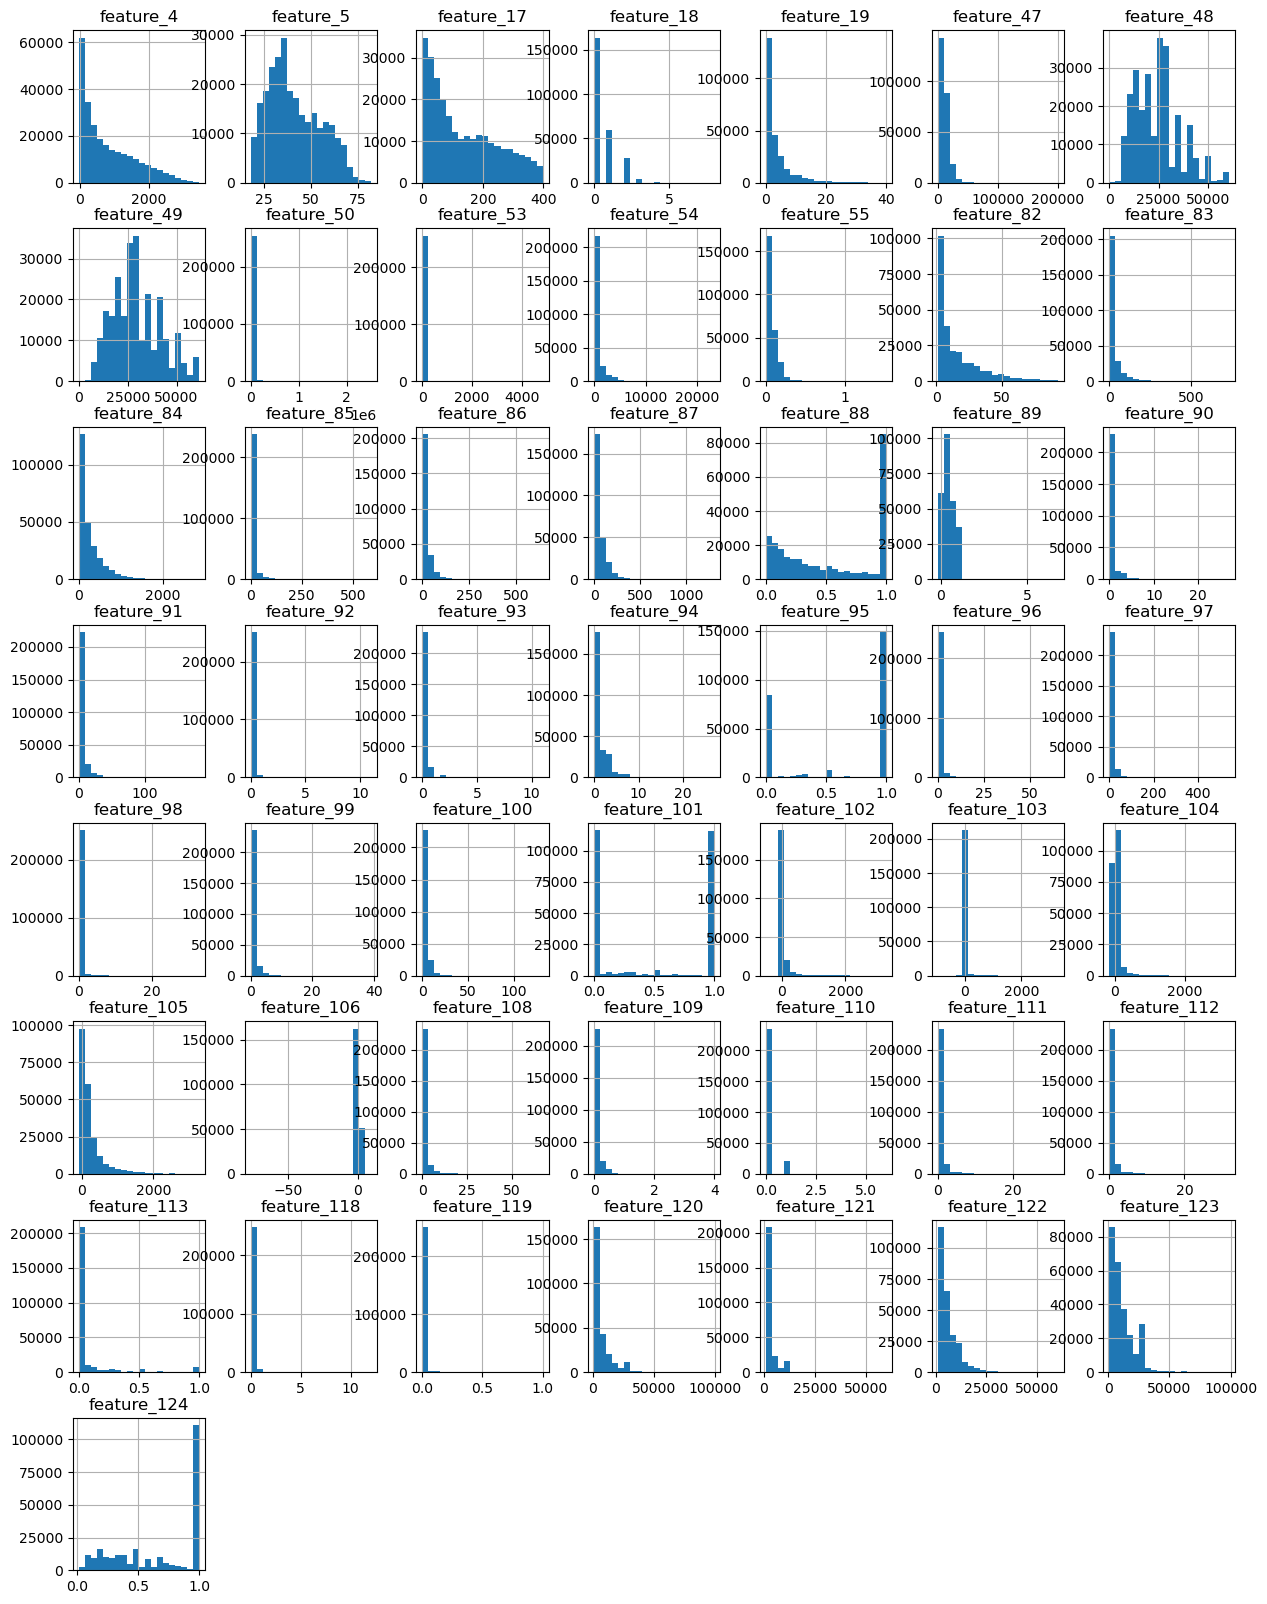

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numeric_df.hist(figsize=(15, 20), bins=20)
plt.show()

(So yes it is possible that there are also non-binary categorical columns. Lets keep it in mind)

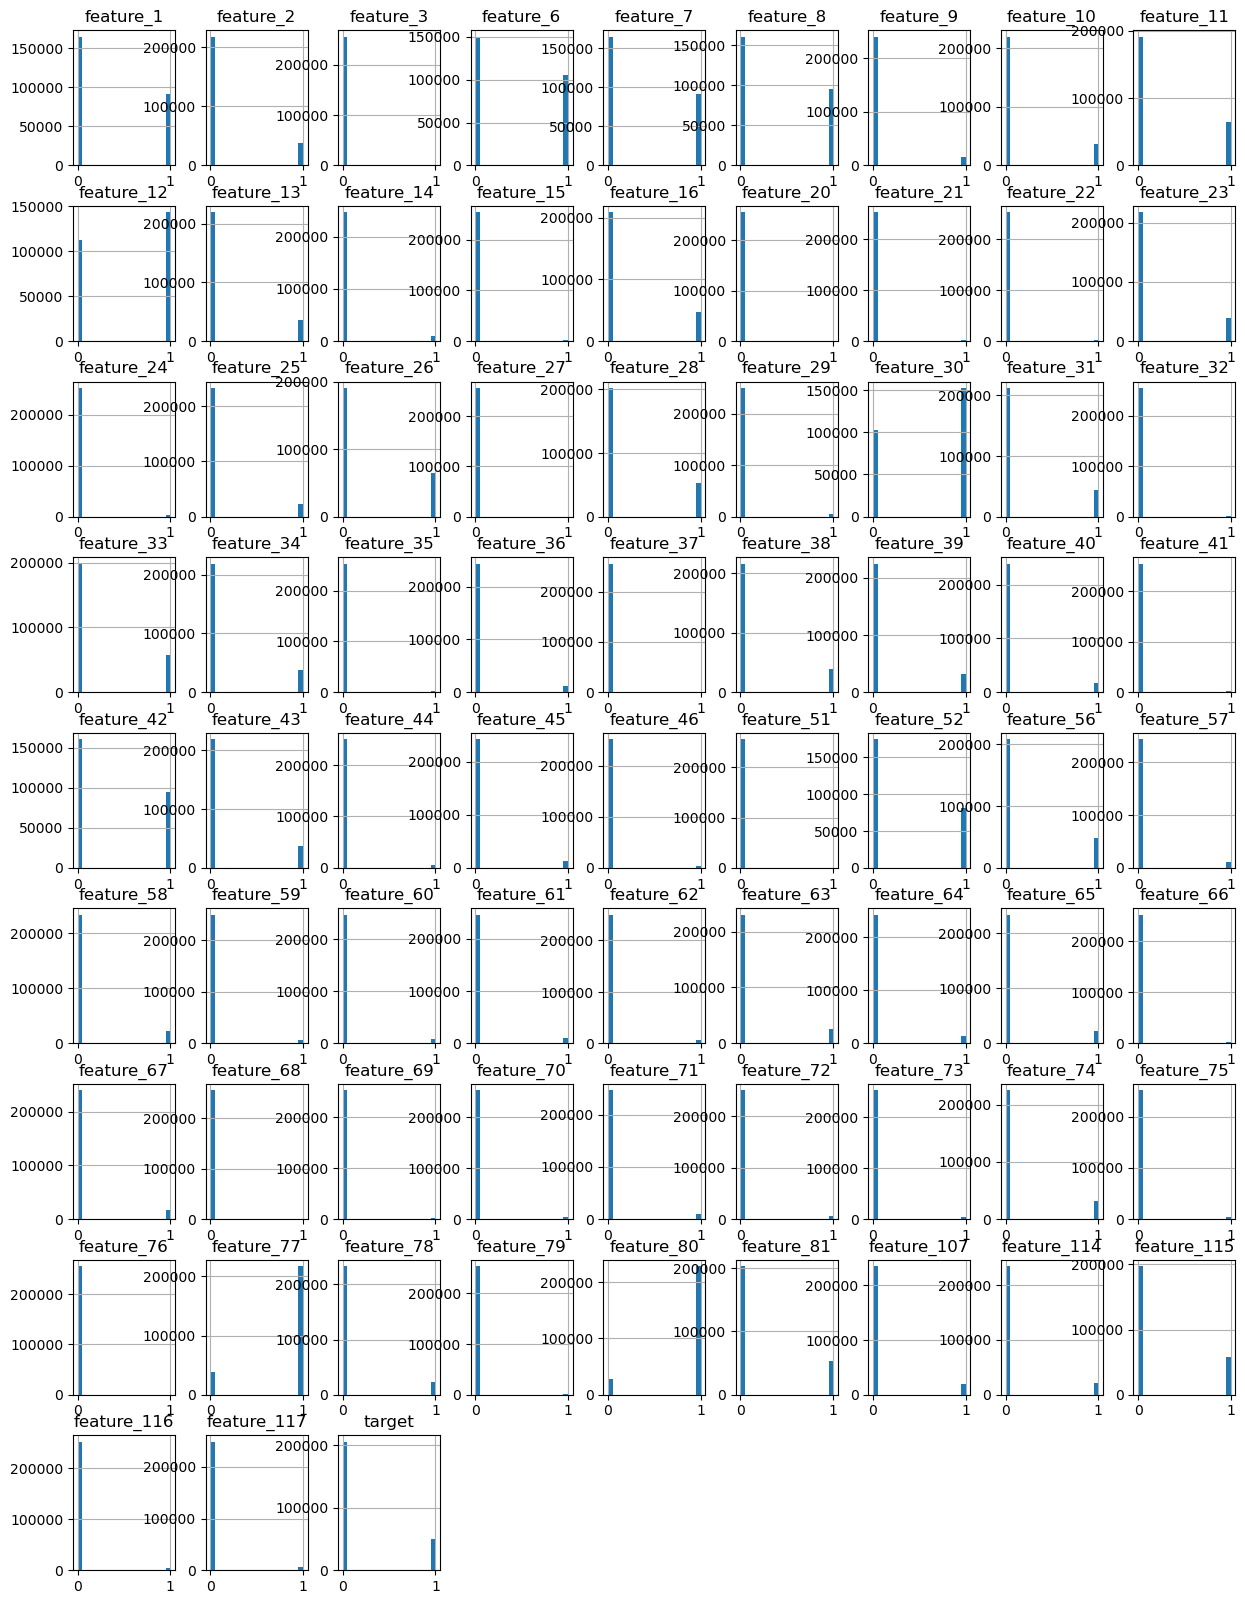

In [15]:
# as a bonus lets visualize detected possible ctagerical columns distribution
categorical_df = data_df[binary_categorical_columns]

# Plot histograms for numerical columns
categorical_df.hist(figsize=(15, 20), bins=20)
plt.show()

# Data preparation

## Imputing Numeric Values

replace NaN with mean values in numerical columns

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

In [17]:
# Before we perform imputation, let's check the no. of missing values in each numeric column.
data_df[true_numeric_columns].isna().sum()

feature_4          0
feature_5          0
feature_17         0
feature_18         0
feature_19         0
feature_47         0
feature_48         0
feature_49         0
feature_50         0
feature_53         0
feature_54         0
feature_55         0
feature_82         0
feature_83         0
feature_84         0
feature_85         0
feature_86         0
feature_87         0
feature_88         0
feature_89         0
feature_90         0
feature_91         0
feature_92         0
feature_93         0
feature_94         0
feature_95         0
feature_96         0
feature_97         0
feature_98         0
feature_99         0
feature_100        0
feature_101        0
feature_102    37795
feature_103    37795
feature_104    37795
feature_105    37795
feature_106    41893
feature_108        0
feature_109        0
feature_110        0
feature_111        0
feature_112        0
feature_113        0
feature_118        0
feature_119        0
feature_120        0
feature_121        0
feature_122  

In [18]:
# Fit the Imputer with mean
imputer.fit(data_df[true_numeric_columns])

SimpleImputer()

In [19]:
# see the results
list(imputer.statistics_)

[819.4530490188414,
 41.053213196778984,
 135.1397584238918,
 0.5071691032757407,
 3.2908384801813773,
 9128.381995152842,
 24710.608466890782,
 29409.93549370651,
 41910.396841529204,
 0.8482578267922759,
 516.8211015948715,
 0.06060281450238449,
 15.79945274020796,
 26.475091861465092,
 255.8225431944336,
 8.725084043468064,
 22.53887108122899,
 61.842858259713864,
 0.5342619658147465,
 0.44538180823934725,
 0.4856617934485185,
 4.113450863888672,
 0.028140880306465485,
 0.11655851770776327,
 1.3960753654913611,
 0.6180923629814327,
 0.5467086232507231,
 7.480689547337972,
 0.10627785161441639,
 0.37640137596747714,
 2.619748260495661,
 0.48524002277198314,
 59.9925742460727,
 17.457979589496617,
 59.18422199289073,
 241.54838665290677,
 0.35259656858050303,
 1.055601594871394,
 0.061278116058996274,
 0.08343757329372214,
 0.4344695489015714,
 0.432581502619029,
 0.06474622695325839,
 0.03599014932374326,
 0.00592897999692814,
 7201.150125087953,
 2866.290817762489,
 5904.25458179774

In [20]:
# Impute the data in original df with mean
data_df[true_numeric_columns] = imputer.transform(data_df[true_numeric_columns])
# see the results
data_df[true_numeric_columns].isna().sum()

feature_4      0
feature_5      0
feature_17     0
feature_18     0
feature_19     0
feature_47     0
feature_48     0
feature_49     0
feature_50     0
feature_53     0
feature_54     0
feature_55     0
feature_82     0
feature_83     0
feature_84     0
feature_85     0
feature_86     0
feature_87     0
feature_88     0
feature_89     0
feature_90     0
feature_91     0
feature_92     0
feature_93     0
feature_94     0
feature_95     0
feature_96     0
feature_97     0
feature_98     0
feature_99     0
feature_100    0
feature_101    0
feature_102    0
feature_103    0
feature_104    0
feature_105    0
feature_106    0
feature_108    0
feature_109    0
feature_110    0
feature_111    0
feature_112    0
feature_113    0
feature_118    0
feature_119    0
feature_120    0
feature_121    0
feature_122    0
feature_123    0
feature_124    0
dtype: int64

## Scale Numeric Values

In [22]:
data_df[true_numeric_columns].describe()

,feature_4,feature_5,feature_17,feature_18,feature_19,feature_47,feature_48,feature_49,feature_50,feature_53,feature_54,feature_55,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
count,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,2.558200e+05,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000
mean,819.453049,41.053213,135.139758,0.507169,3.290838,9128.381995,24710.608467,29409.935494,4.191040e+04,0.848258,516.821102,0.060603,15.799453,26.475092,255.822543,8.725084,22.538871,61.842858,0.534262,0.445382,0.485662,4.113451,0.028141,0.116559,1.396075,0.618092,0.546709,7.480690,0.106278,0.376401,2.619748,0.485240,59.992574,17.457980,59.184222,241.548387,0.352597,1.055602,0.061278,0.083438,0.434470,0.432582,0.064746,0.035990,0.005929,7201.150125,2866.290818,5904.254582,12100.793241,0.659698
std,772.966593,13.754019,110.063157,0.772278,5.010320,6889.862296,11193.427808,12102.403580,2.639693e+04,36.391384,968.218907,0.080295,18.075658,41.360118,299.818634,21.681472,27.111927,67.938223,0.388521,0.307744,1.204242,8.037153,0.233170,0.439546,2.028268,0.466044,1.508560,13.646188,0.633397,1.055833,3.969828,0.481404,179.987267,114.820448,136.284288,331.641058,0.473987,2.474374,0.123229,0.283040,1.196756,1.191449,0.189278,0.256262,0.057655,8139.745183,3241.112692,4832.221046,9928.531737,0.343397
min,-18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-490.000000,-948.000000,-153.000000,-81.000000,-76.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.016667
25%,163.000000,30.000000,39.000000,0.000000,0.300000,5000.000000,15000.000000,20000.000000,2.700000e+04,0.000000,0.000000,0.000000,3.000000,5.000000,47.000000,1.000000,8.000000,17.000000,0.150000,0.188459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,13.000000,44.000000,0.044944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,1000.000000,2559.024050,5000.000000,0.333333
50%,562.000000,38.000000,103.000000,0.000000,1.400000,7000.000000,25000.000000,28000.000000,4.000000e+04,0.000000,60.000000,0.020000,9.000000,12.000000,146.000000,2.000000,14.000000,38.000000,0.466667,0.385691,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.333333,16.000000,2.000000,30.000000,148.000000,0.254902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,2000.000000,4277.777700,10000.000000,0.705882
75%,1329.000000,52.000000,218.000000,1.000000,4.000000,10000.000000,30000.000000,37000.000000,5.000000e+04,0.000000,570.000000,0.130434,23.000000,29.000000,356.000000,7.000000,26.000000,83.000000,1.000000,0.665901,0.000000,5.000000,0.000000,0.0000

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_df[true_numeric_columns])

MinMaxScaler()

In [24]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-18.0,
 18.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.166666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -490.0,
 -948.0,
 -153.0,
 -81.0,
 -76.6,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 0.0166666666666667]

In [25]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[3451.0,
 82.0,
 397.0,
 8.0,
 40.0,
 200000.0,
 61000.0,
 61500.0,
 2500000.0,
 4823.0,
 23272.85,
 1.52,
 93.0,
 733.0,
 2861.0,
 588.0,
 639.0,
 1303.0,
 1.0,
 6.76,
 27.0,
 182.0,
 11.0,
 11.0,
 27.0,
 1.0,
 65.0,
 544.0,
 33.0,
 39.0,
 131.0,
 1.0,
 3278.0,
 3278.0,
 3278.0,
 3278.0,
 9.428571428571429,
 67.0,
 4.0,
 6.0,
 32.0,
 32.0,
 1.0,
 12.0,
 1.0,
 99000.0,
 60000.0,
 60000.0,
 99000.0,
 1.0]

In [26]:
data_df.loc[:, true_numeric_columns] = scaler.transform(data_df[true_numeric_columns])
data_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,target
0,1,0,0,0.403286,0.703125,0,0,1,0,0,0,1,0,0,0,0,0.576826,0.000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1250,0.169344,0.330569,0.01400,...,0,1,0,0,1,0,0.195652,0.032742,0.334149,0.006803,0.078247,0.264774,0.069565,0.124002,0.0,0.071429,0.0,0.000000,0.148148,0.0,0.015385,0.071691,0.0,0.051282,0.152672,0.05,0.146231,0.224326,0.051297,0.053885,0.897493,0,0.059701,0.052632,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.061224,0.050847,0.110616,0.112245,0.576271,0
1,0,0,0,0.526665,0.234375,1,0,1,0,0,1,0,0,0,0,0,0.168766,0.250,0.0175,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.1100,0.409836,0.406504,0.02200,...,0,1,0,0,1,0,0.652174,0.005457,0.142258,0.001701,0.009390,0.018419,0.166667,0.056543,0.0,0.005495,0.0,0.000000,0.037037,0.0,0.000000,0.003676,0.0,0.000000,0.007634,0.00,0.130042,0.224326,0.051297,0.086038,0.890402,1,0.074627,0.020492,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.091837,0.000000,0.125313,0.295918,0.322034,0
2,0,0,0,0.525223,0.171875,0,1,0,0,0,1,0,0,0,0,0,0.465995,0.000,0.0750,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0250,0.491803,0.650407,0.01600,...,0,1,0,0,1,0,0.576087,0.004093,0.411744,0.001701,0.032864,0.094398,0.024390,0.118334,0.0,0.109890,0.0,0.000000,0.296296,0.0,0.000000,0.033088,0.0,0.000000,0.038168,0.00,0.134289,0.224326,0.047799,0.058351,0.892019,0,0.044776,0.013889,0.0,0.15625,0.15625,0.092593,0,1,0,0,0.0,0.0,0.020408,0.000000,0.041117,0.142857,0.186441,0
3,0,0,0,0.454886,0.156250,1,1,0,0,0,0,1,0,0,0,0,0.634761,0.125,0.1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.0500,0.409836,0.406504,0.01000,...,0,1,0,0,1,0,0.804348,0.010914,0.217756,0.000000,0.012520,0.028396,0.216216,0.081717,0.0,0.021978,0.0,0.000000,0.037037,0.0,0.000000,0.029412,0.0,0.000000,0.022901,0.00,0.131369,0.224562,0.048091,0.058648,0.890903,0,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.010204,0.000000,0.016045,0.020408,0.661017,0
4,0,0,0,0.079562,0.234375,1,0,0,0,1,0,1,0,0,0,0,0.010076,0.250,0.0025,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0500,0.278689,0.413008,0.01016,...,0,1,1,0,0,0,0.086957,0.013643,0.026914,0.001701,0.012520,0.013814,0.555556,0.067149,0.0,0.010989,0.0,0.000000,0.037037,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.00,0.130308,0.224562,0.045759,0.028282,0.891232,0,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.010204,0.016949,0.058380,0.071429,0.237288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255815,0,1,0,0.005765,0.187500,0,1,0,0,0,1,0,

In [27]:
data_df[true_numeric_columns].describe()

,feature_4,feature_5,feature_17,feature_18,feature_19,feature_47,feature_48,feature_49,feature_50,feature_53,feature_54,feature_55,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
count,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000
mean,0.241411,0.360206,0.340402,0.063396,0.082271,0.045642,0.405092,0.478210,0.016764,0.000176,0.022207,0.039870,0.160864,0.036119,0.089417,0.014839,0.035272,0.047462,0.534262,0.088361,0.017987,0.022601,0.002558,0.010596,0.051706,0.618092,0.008411,0.013751,0.003221,0.009651,0.019998,0.485240,0.145964,0.228457,0.061843,0.096025,0.894500,0.015755,0.015320,0.013906,0.013577,0.013518,0.064746,0.002999,0.005929,0.063277,0.031632,0.083123,0.113273,0.653930
std,0.222821,0.214907,0.277237,0.096535,0.125258,0.034449,0.183499,0.196787,0.010559,0.007545,0.041603,0.052826,0.196475,0.056426,0.104795,0.036873,0.042429,0.052140,0.388521,0.044429,0.044602,0.044160,0.021197,0.039959,0.075121,0.466044,0.023209,0.025085,0.019194,0.027073,0.030304,0.481404,0.047767,0.027170,0.039721,0.098732,0.005510,0.036931,0.030807,0.047173,0.037399,0.037233,0.189278,0.021355,0.057655,0.083059,0.054934,0.081902,0.101312,0.349217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.052176,0.187500,0.098237,0.000000,0.007500,0.025000,0.245902,0.325203,0.010800,0.000000,0.000000,0.000000,0.021739,0.006821,0.016428,0.001701,0.012520,0.013047,0.150000,0.051269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131369,0.224326,0.048382,0.037213,0.890924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.026424,0.040816,0.322034
50%,0.167195,0.312500,0.259446,0.000000,0.035000,0.035000,0.409836,0.455285,0.016000,0.000000,0.002578,0.013158,0.086957,0.016371,0.051031,0.003401,0.021909,0.029163,0.466667,0.079744,0.000000,0.005495,0.000000,0.000000,0.037037,1.000000,0.000000,0.003676,0.000000,0.000000,0.007634,0.333333,0.134289,0.224799,0.053337,0.068175,0.893365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030612,0.016949,0.055556,0.091837,0.700897
75%,0.388296,0.531250,0.549118,0.125000,0.100000,0.050000,0.491803,0.601626,0.020000,0.000000,0.024492,0.085812,0.239130,0.039563,0.124432,0.011905,0.040689,0.063699,1.000000,0.120197,0.000000,0.027473,0.000000,0.000000,0.074074,1.000000,0.000000,0.016544,0.000000,0.000000,0.022901,1.000000,0.145964,0.227402,0.061843,0.096025,0.896214,0.014925,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091837,0.033898,0.112514,0.153061,1.000000


## Selecting inputs and targets

In [28]:
data_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,target
0,1,0,0,0.403286,0.703125,0,0,1,0,0,0,1,0,0,0,0,0.576826,0.000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1250,0.169344,0.330569,0.01400,...,0,1,0,0,1,0,0.195652,0.032742,0.334149,0.006803,0.078247,0.264774,0.069565,0.124002,0.0,0.071429,0.0,0.000000,0.148148,0.0,0.015385,0.071691,0.0,0.051282,0.152672,0.05,0.146231,0.224326,0.051297,0.053885,0.897493,0,0.059701,0.052632,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.061224,0.050847,0.110616,0.112245,0.576271,0
1,0,0,0,0.526665,0.234375,1,0,1,0,0,1,0,0,0,0,0,0.168766,0.250,0.0175,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.1100,0.409836,0.406504,0.02200,...,0,1,0,0,1,0,0.652174,0.005457,0.142258,0.001701,0.009390,0.018419,0.166667,0.056543,0.0,0.005495,0.0,0.000000,0.037037,0.0,0.000000,0.003676,0.0,0.000000,0.007634,0.00,0.130042,0.224326,0.051297,0.086038,0.890402,1,0.074627,0.020492,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.091837,0.000000,0.125313,0.295918,0.322034,0
2,0,0,0,0.525223,0.171875,0,1,0,0,0,1,0,0,0,0,0,0.465995,0.000,0.0750,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0250,0.491803,0.650407,0.01600,...,0,1,0,0,1,0,0.576087,0.004093,0.411744,0.001701,0.032864,0.094398,0.024390,0.118334,0.0,0.109890,0.0,0.000000,0.296296,0.0,0.000000,0.033088,0.0,0.000000,0.038168,0.00,0.134289,0.224326,0.047799,0.058351,0.892019,0,0.044776,0.013889,0.0,0.15625,0.15625,0.092593,0,1,0,0,0.0,0.0,0.020408,0.000000,0.041117,0.142857,0.186441,0
3,0,0,0,0.454886,0.156250,1,1,0,0,0,0,1,0,0,0,0,0.634761,0.125,0.1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.0500,0.409836,0.406504,0.01000,...,0,1,0,0,1,0,0.804348,0.010914,0.217756,0.000000,0.012520,0.028396,0.216216,0.081717,0.0,0.021978,0.0,0.000000,0.037037,0.0,0.000000,0.029412,0.0,0.000000,0.022901,0.00,0.131369,0.224562,0.048091,0.058648,0.890903,0,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.010204,0.000000,0.016045,0.020408,0.661017,0
4,0,0,0,0.079562,0.234375,1,0,0,0,1,0,1,0,0,0,0,0.010076,0.250,0.0025,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0500,0.278689,0.413008,0.01016,...,0,1,1,0,0,0,0.086957,0.013643,0.026914,0.001701,0.012520,0.013814,0.555556,0.067149,0.0,0.010989,0.0,0.000000,0.037037,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.00,0.130308,0.224562,0.045759,0.028282,0.891232,0,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.010204,0.016949,0.058380,0.071429,0.237288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255815,0,1,0,0.005765,0.187500,0,1,0,0,0,1,0,

In [29]:
data_df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [30]:
target_col_list = 'target'

In [32]:
input_cols_list = list(data_df.drop('target', axis=1).columns)
len(input_cols_list)

124

# Training and Validation set

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(data_df[input_cols_list], 
                                                                        data_df[target_col_list], 
                                                                        test_size=0.25, 
                                                                        random_state=68)

In [35]:
train_inputs

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
68502,0,0,0,0.083886,0.140625,0,1,0,0,0,0,1,0,0,0,0,0.095718,0.000,0.0275,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0500,0.409836,0.585366,0.0144,...,0,0,1,1,0,0,0,0.163043,0.001364,0.041943,0.001701,0.010955,0.039908,0.019231,0.087521,0.000000,0.016484,0.0,0.0,0.074074,0.00,0.000000,0.009191,0.000000,0.000000,0.022901,0.0,0.130042,0.224326,0.045468,0.029771,0.890402,1,0.044776,0.046875,0.000000,0.00000,0.00000,0.000000,0,0,0,0,0.000000,0.000000,0.295918,0.016949,0.360169,0.295918,1.000000
229965,1,0,0,0.298645,0.375000,0,0,1,0,0,0,1,0,0,0,0,0.667506,0.250,0.1000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0250,0.327869,0.569106,0.0160,...,0,0,1,0,0,1,0,0.217391,0.062756,0.193988,0.005102,0.040689,0.056792,0.621622,0.102770,0.000000,0.010989,0.0,0.0,0.037037,0.00,0.030769,0.034926,0.000000,0.000000,0.030534,0.5,0.130308,0.224326,0.051297,0.050908,0.890531,0,0.014925,0.011905,0.000000,0.06250,0.06250,0.095238,0,1,0,1,0.083333,0.047619,0.295918,0.067797,0.373123,0.360204,0.823505
111175,0,0,0,0.142981,0.781250,0,0,1,0,0,0,0,1,0,0,1,0.790932,0.000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0375,0.245902,0.243902,0.0140,...,0,0,1,0,0,1,0,0.108696,0.004093,0.020273,0.000000,0.007825,0.016117,0.142857,0.041579,0.000000,0.016484,0.0,0.0,0.037037,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.145701,0.224562,0.056835,0.087824,0.893607,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0,0,0,0,0.000000,0.000000,0.017347,0.000000,0.009168,0.017347,1.000000
54893,1,1,0,0.021620,0.046875,0,0,0,0,0,0,1,0,0,0,0,0.649874,0.000,0.0150,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.0250,0.385246,0.552846,0.0228,...,0,0,1,0,0,1,0,0.000000,0.077763,0.019923,0.096939,0.089202,0.043745,1.000000,0.168431,0.000000,0.000000,0.0,0.0,0.000000,1.00,0.015385,0.001838,0.030303,0.025641,0.007634,1.0,0.145964,0.228457,0.061843,0.096025,0.894500,0,0.000000,0.000000,0.166667,0.03125,0.03125,1.000000,1,1,0,0,0.000000,0.000000,0.010204,0.016949,0.016949,0.010204,1.000000
60360,0,0,0,0.244739,0.421875,0,0,0,0,1,0,1,0,0,0,0,0.085642,0.375,0.0375,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.0250,0.049180,0.048780,0.0012,...,0,0,0,0,0,1,1,0.347826,0.020464,0.211115,0.003401,0.028169,0.042210,0.272727,0.128994,0.000000,0.032967,0.0,0.0,0.037037,0.00,0.000000,0.023897,0.000000,0.000000,0.030534,0.0,0.134289,0.224562,0.046634,0.033641,0.896214,0,0.000000,0.000000,0.000000,0.06250,0.06250,0.060606,0,1,0,0,0.000000,0.000000,0.020408,0.016949,0.032357,0.040816,0.593220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [36]:
train_targets

68502     0
229965    0
111175    1
54893     1
60360     0
         ..
76012     0
52132     1
112039    0
87538     0
142143    0
Name: target, Length: 191865, dtype: int64

In [37]:
val_inputs

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
41931,1,0,0,0.065725,0.281250,0,1,0,0,0,1,0,0,0,0,0,0.984887,0.125,0.1000,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.050,0.491803,0.487805,0.01200,...,0,0,0,0,0,1,0,0.065217,0.096862,0.064663,0.011905,0.040689,0.054490,1.000000,0.151244,0.037037,0.010989,0.0,0.0,0.037037,1.0,0.046154,0.012868,0.0,0.025641,0.022901,1.000000,0.131369,0.224326,0.045759,0.027687,0.895245,0,0.014925,0.035714,0.000000,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.163265,0.016949,0.111380,0.163265,1.000000
4133,0,0,0,0.444220,0.328125,0,0,1,0,0,0,1,0,0,0,0,0.080605,0.250,0.1250,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.050,0.586885,0.582114,0.01960,...,0,0,1,0,0,1,0,0.380435,0.019100,0.145753,0.001701,0.017214,0.066769,0.160920,0.063590,0.000000,0.010989,0.0,0.0,0.037037,0.0,0.000000,0.016544,0.0,0.000000,0.045802,0.000000,0.131635,0.224326,0.053629,0.066091,0.890897,0,0.014925,0.006944,0.000000,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.010204,0.016949,0.099529,0.265306,0.058380
188248,1,0,0,0.239550,0.843750,1,0,1,0,0,1,0,0,0,0,0,0.090680,0.000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.015,0.131148,0.130081,0.00840,...,0,0,1,0,0,1,1,0.065217,0.210095,0.142607,0.011905,0.090767,0.118189,1.000000,0.096513,0.000000,0.027473,0.0,0.0,0.111111,0.0,0.046154,0.022059,0.0,0.025641,0.038168,0.600000,0.130042,0.224326,0.064121,0.080976,0.890402,1,0.014925,0.035714,0.166667,0.03125,0.03125,0.142857,1,1,0,0,0.0,0.0,0.295918,0.016949,0.175545,0.295918,1.000000
170256,0,0,0,0.414240,0.125000,1,1,0,0,0,1,0,0,0,0,0,0.347607,0.000,0.0500,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.050,0.409836,0.406504,0.02800,...,0,0,1,0,0,1,0,0.347826,0.017735,0.164278,0.003401,0.021909,0.033001,0.302326,0.071880,0.000000,0.038462,0.0,0.0,0.111111,0.0,0.000000,0.007353,0.0,0.000000,0.007634,0.000000,0.130839,0.224326,0.053046,0.171182,0.890472,0,0.029851,0.015152,0.000000,0.06250,0.06250,0.060606,0,1,0,0,0.0,0.0,0.142857,0.016949,0.233179,0.295918,0.491525
57551,0,0,0,0.492649,0.140625,0,1,0,0,0,0,1,0,0,0,0,0.236776,0.000,0.1000,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.025,0.327869,0.325203,0.00800,...,0,0,1,0,0,1,0,0.184783,0.020464,0.133170,0.005102,0.032864,0.075979,0.151515,0.056590,0.000000,0.005495,0.0,0.0,0.037037,0.0,0.000000,0.027574,0.0,0.000000,0.053435,0.000000,0.175159,0.224799,0.067036,0.258708,0.892910,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.020408,0.000000,0.029190,0.040816,0.593220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [38]:
val_targets

41931     0
4133      0
188248    0
170256    0
57551     0
         ..
144824    0
117843    0
179451    0
125673    0
16254     0
Name: target, Length: 63955, dtype: int64

# Train a Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression

In [42]:
# Create and train the model
model = LogisticRegression(max_iter=200)

In [43]:
model.fit(train_inputs, train_targets)

LogisticRegression(max_iter=200)

# Make Predictions and Evaluate the Model

## Make Predictions

In [44]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [50]:
# Making predictions on the validation set
val_preds = model.predict(val_inputs)
val_preds

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
# predict the probabilities for target being 1
val_preds_probability = model.predict_proba(val_inputs)[:, 1] 
val_preds_probability

array([0.11545231, 0.05870937, 0.80966483, ..., 0.2791451 , 0.1617278 ,
       0.24757101])

## Evaluating the Model

In [54]:
# Calculate needed metrics for the validation set
roc_auc_val = roc_auc_score(val_targets, val_preds_probability)
print(f"Validation ROC-AUC: {roc_auc_val}")

f1_val = f1_score(val_targets, val_preds)
print(f"Validation F1 Score: {f1_val}")

gini_val = 2 * roc_auc_val - 1
print(f"Validation Gini Coefficient: {gini_val}")

Validation ROC-AUC: 0.7720138222426218
Validation F1 Score: 0.27335598155787433
Validation Gini Coefficient: 0.5440276444852437


**ROC-AUC** -> A score of 0.5 means no discrimination (random guessing), while a score of 1.0 means perfect discrimination.  
score of 0.772 means that our model is ok

**F1 score** -> F1 score close to 1 indicates better model performance, while a score of 0 suggests the model is not performing well in identifying the positive class.  
score of 0.2734 is low, model tuning needed.  


**Gini Coefficient** -> 0 indicates no discriminatory power and 1 indicates perfect discrimination.  
score of  0.544 means that our model is ok

## Visualization of Validation Metrics

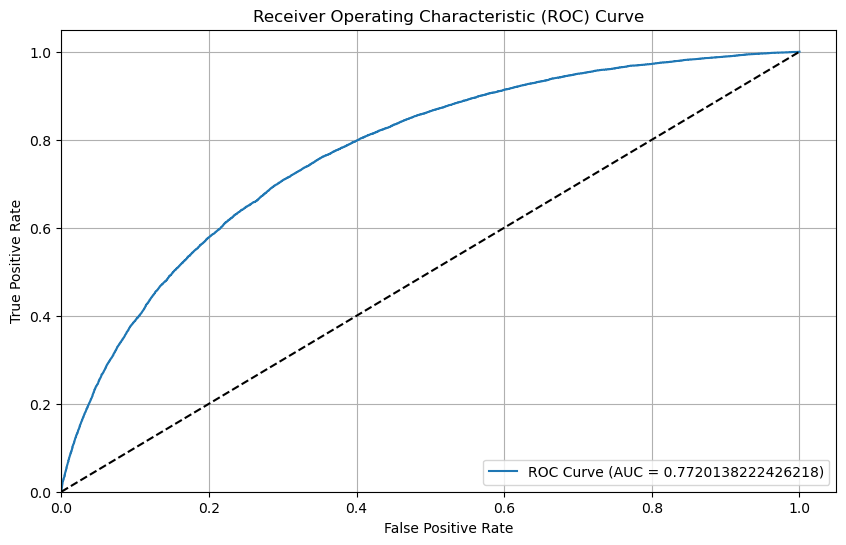

In [70]:
#ROC AUC Visualization

from sklearn.metrics import roc_curve

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(val_targets, val_preds_probability)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_val})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

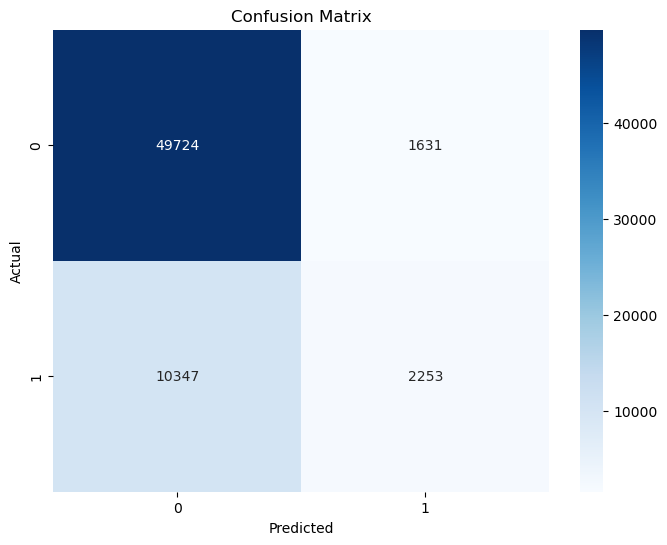

In [72]:
# Confusion Matrix Visualization

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(val_targets, (val_preds_probability > 0.5).astype(int))

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

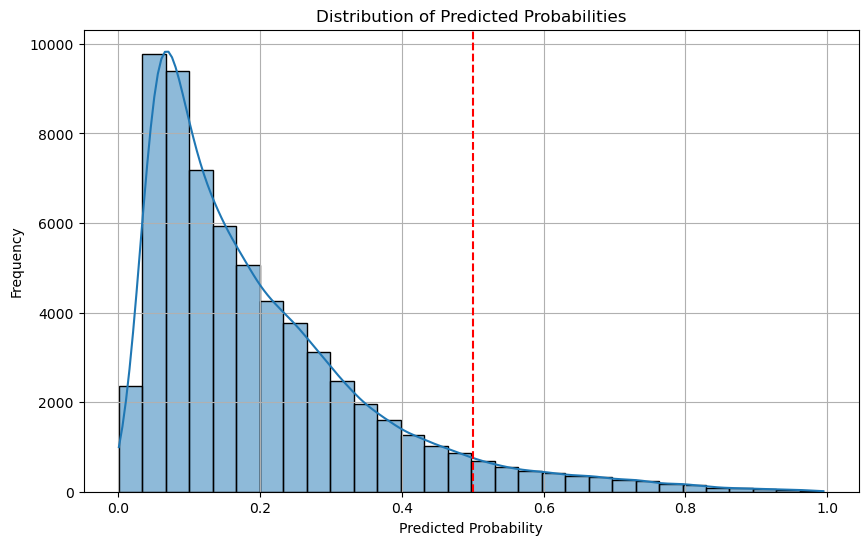

In [71]:
# Predicted probabilities distribution visualization


plt.figure(figsize=(10, 6))
sns.histplot(val_preds_probability, bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.grid()
plt.show()

# Model Tuning

## Multicollinearity Check

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [87]:
def calculate_vif(df):
    """
    Calculate VIF for each feature in the DataFrame and return DataFrame with VIF values for each feature.
    """
    df_with_const = add_constant(df)  # New df with constant term (intercept)
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_with_const.columns
    
    vif_values = []
    
    for i in range(df_with_const.shape[1]):
        try:
            vif = variance_inflation_factor(df_with_const.values, i)  # Calculate VIF
            vif_values.append(vif)  # Append VIF value to the list
        except ZeroDivisionError:
            vif_values.append(float('inf'))  # Assign infinity if there's a division by zero
    
    vif_data["VIF"] = vif_values
    
    return vif_data

In [88]:
def remove_multicollinearity(df, threshold=10):
    """
    Removes features from df with high multicollinearity based on VIF value.
    """
    df_reduced = df.copy()  # Create a copy of the DataFrame
    
    while True:
        df_with_const = add_constant(df_reduced)
        vif_data = calculate_vif(df_with_const)
        
        max_vif = vif_data["VIF"].max()  # Calculate max VIF
        
        if max_vif <= threshold:  # Check if all VIFs are below the threshold
            break
        
        # Drop feature with the highest VIF
        feature_to_drop = vif_data.sort_values("VIF", ascending=False).iloc[0]["feature"]
        if feature_to_drop != 'const':
            df_reduced = df_reduced.drop(columns=[feature_to_drop])
            print(f"Dropping feature: {feature_to_drop} with VIF: {max_vif}")
        else:
            break
    
    return df_reduced

In [89]:
data_df_features = data_df.drop(columns=['target'])
data_df_target = data_df['target']

data_df_no_multicoll = remove_multicollinearity(data_df_features, threshold=10)

D:\conda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
D:\conda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature: feature_62 with VIF: inf


D:\conda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature: feature_13 with VIF: inf


In [90]:
data_df_no_multicoll

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,...,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
0,1,0,0,0.403286,0.703125,0,0,1,0,0,0,1,0,0,0,0.576826,0.000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1250,0.169344,0.330569,0.01400,0,...,0,0,1,0,0,1,0,0.195652,0.032742,0.334149,0.006803,0.078247,0.264774,0.069565,0.124002,0.0,0.071429,0.0,0.000000,0.148148,0.0,0.015385,0.071691,0.0,0.051282,0.152672,0.05,0.146231,0.224326,0.051297,0.053885,0.897493,0,0.059701,0.052632,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.061224,0.050847,0.110616,0.112245,0.576271
1,0,0,0,0.526665,0.234375,1,0,1,0,0,1,0,0,0,0,0.168766,0.250,0.0175,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.1100,0.409836,0.406504,0.02200,0,...,0,0,1,0,0,1,0,0.652174,0.005457,0.142258,0.001701,0.009390,0.018419,0.166667,0.056543,0.0,0.005495,0.0,0.000000,0.037037,0.0,0.000000,0.003676,0.0,0.000000,0.007634,0.00,0.130042,0.224326,0.051297,0.086038,0.890402,1,0.074627,0.020492,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.091837,0.000000,0.125313,0.295918,0.322034
2,0,0,0,0.525223,0.171875,0,1,0,0,0,1,0,0,0,0,0.465995,0.000,0.0750,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0250,0.491803,0.650407,0.01600,0,...,0,0,1,0,0,1,0,0.576087,0.004093,0.411744,0.001701,0.032864,0.094398,0.024390,0.118334,0.0,0.109890,0.0,0.000000,0.296296,0.0,0.000000,0.033088,0.0,0.000000,0.038168,0.00,0.134289,0.224326,0.047799,0.058351,0.892019,0,0.044776,0.013889,0.0,0.15625,0.15625,0.092593,0,1,0,0,0.0,0.0,0.020408,0.000000,0.041117,0.142857,0.186441
3,0,0,0,0.454886,0.156250,1,1,0,0,0,0,1,0,0,0,0.634761,0.125,0.1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.0500,0.409836,0.406504,0.01000,0,...,0,0,1,0,0,1,0,0.804348,0.010914,0.217756,0.000000,0.012520,0.028396,0.216216,0.081717,0.0,0.021978,0.0,0.000000,0.037037,0.0,0.000000,0.029412,0.0,0.000000,0.022901,0.00,0.131369,0.224562,0.048091,0.058648,0.890903,0,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.010204,0.000000,0.016045,0.020408,0.661017
4,0,0,0,0.079562,0.234375,1,0,0,0,1,0,1,0,0,0,0.010076,0.250,0.0025,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0500,0.278689,0.413008,0.01016,0,...,0,0,1,1,0,0,0,0.086957,0.013643,0.026914,0.001701,0.012520,0.013814,0.555556,0.067149,0.0,0.010989,0.0,0.000000,0.037037,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.00,0.130308,0.224562,0.045759,0.028282,0.891232,0,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.010204,0.016949,0.058380,0.071429,0.237288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255815,0,1,0,0.005765,0.187500,0,1,0,0,0,

In [92]:
data_df_no_multicoll['target'] = data_df_target
data_df_no_multicoll

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,...,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,target
0,1,0,0,0.403286,0.703125,0,0,1,0,0,0,1,0,0,0,0.576826,0.000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1250,0.169344,0.330569,0.01400,0,...,0,1,0,0,1,0,0.195652,0.032742,0.334149,0.006803,0.078247,0.264774,0.069565,0.124002,0.0,0.071429,0.0,0.000000,0.148148,0.0,0.015385,0.071691,0.0,0.051282,0.152672,0.05,0.146231,0.224326,0.051297,0.053885,0.897493,0,0.059701,0.052632,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.061224,0.050847,0.110616,0.112245,0.576271,0
1,0,0,0,0.526665,0.234375,1,0,1,0,0,1,0,0,0,0,0.168766,0.250,0.0175,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.1100,0.409836,0.406504,0.02200,0,...,0,1,0,0,1,0,0.652174,0.005457,0.142258,0.001701,0.009390,0.018419,0.166667,0.056543,0.0,0.005495,0.0,0.000000,0.037037,0.0,0.000000,0.003676,0.0,0.000000,0.007634,0.00,0.130042,0.224326,0.051297,0.086038,0.890402,1,0.074627,0.020492,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.091837,0.000000,0.125313,0.295918,0.322034,0
2,0,0,0,0.525223,0.171875,0,1,0,0,0,1,0,0,0,0,0.465995,0.000,0.0750,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0250,0.491803,0.650407,0.01600,0,...,0,1,0,0,1,0,0.576087,0.004093,0.411744,0.001701,0.032864,0.094398,0.024390,0.118334,0.0,0.109890,0.0,0.000000,0.296296,0.0,0.000000,0.033088,0.0,0.000000,0.038168,0.00,0.134289,0.224326,0.047799,0.058351,0.892019,0,0.044776,0.013889,0.0,0.15625,0.15625,0.092593,0,1,0,0,0.0,0.0,0.020408,0.000000,0.041117,0.142857,0.186441,0
3,0,0,0,0.454886,0.156250,1,1,0,0,0,0,1,0,0,0,0.634761,0.125,0.1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.0500,0.409836,0.406504,0.01000,0,...,0,1,0,0,1,0,0.804348,0.010914,0.217756,0.000000,0.012520,0.028396,0.216216,0.081717,0.0,0.021978,0.0,0.000000,0.037037,0.0,0.000000,0.029412,0.0,0.000000,0.022901,0.00,0.131369,0.224562,0.048091,0.058648,0.890903,0,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.010204,0.000000,0.016045,0.020408,0.661017,0
4,0,0,0,0.079562,0.234375,1,0,0,0,1,0,1,0,0,0,0.010076,0.250,0.0025,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0500,0.278689,0.413008,0.01016,0,...,0,1,1,0,0,0,0.086957,0.013643,0.026914,0.001701,0.012520,0.013814,0.555556,0.067149,0.0,0.010989,0.0,0.000000,0.037037,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.00,0.130308,0.224562,0.045759,0.028282,0.891232,0,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0,0,0,0,0.0,0.0,0.010204,0.016949,0.058380,0.071429,0.237288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255815,0,1,0,0.005765,0.187500,0,1,0,0,0,1,0,

## Correlation Analysis

In [93]:
correlation_matrix = data_df_no_multicoll.corr()
print(correlation_matrix['target'].sort_values(ascending=False))

target         1.000000
feature_114    0.229713
feature_110    0.225429
feature_83     0.210180
feature_88     0.194820
                 ...   
feature_108   -0.086593
feature_94    -0.108996
feature_91    -0.121316
feature_82    -0.163144
feature_52    -0.188479
Name: target, Length: 123, dtype: float64


Since there is no strong correlation at all, we would not delete any features at this point

## Feature selection (Using Recursive Feature Elimination with Cross-Validation)

In [94]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score


X = data_df_no_multicoll.drop(columns=['target'])
y = data_df_no_multicoll['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=68)

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)

# Apply RFE to select features
selector = RFE(logistic_model, n_features_to_select=6)
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features.tolist())

# Create new training and validation sets with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train_selected, y_train, cv=5, scoring='neg_log_loss')
print("Cross-Validation Scores:", -cv_scores)  # Log loss is negative because we used 'neg_log_loss'
print("Mean Cross-Validation Score:", -cv_scores.mean())

Selected Features: ['feature_55', 'feature_83', 'feature_90', 'feature_91', 'feature_102', 'feature_121']
Cross-Validation Scores: [0.44967416 0.44763955 0.45245074 0.4488303  0.45216824]
Mean Cross-Validation Score: 0.45015259855896


Lets iterate through different number of **n_features_to_select** to get the best CV score

In [101]:
import time

# Create lists to store the results
mean_cv_scores = []

# Iterate through different numbers of features to select
start_time = time.time()
for n_features in range(3, 11):
    selector = RFE(logistic_model, n_features_to_select=n_features)
    selector.fit(X_train, y_train)
    
    # Get the selected features
    selected_features = X_train.columns[selector.support_]
    
    # Perform cross-validation
    cv_scores = cross_val_score(logistic_model, X_train[selected_features], y_train, cv=5, scoring='neg_log_loss')
    
    # Store the mean CV score along with the selected features
    mean_cv_scores.append((cv_scores.mean(), n_features, selected_features.tolist()))

    # Print the progress
    print(f"Processed {n_features} features: Mean CV Score = {-cv_scores.mean()}")

# Find the best score, corresponding number of features, and the best features
best_score = -float('inf')
best_n_features = None
best_features = None

for score, n, features in mean_cv_scores:
    if score > best_score:
        best_score = score
        best_n_features = n
        best_features = features

# End the timer
end_time = time.time()
elapsed_time = end_time - start_time

# Print the results
print("Best Mean Cross-Validation Score:", -best_score)
print("Best Number of Features:", best_n_features)
print("Best Selected Features:", best_features)
print(f"Elapsed Time: {elapsed_time:.2f} seconds")

Processed 3 features: Mean CV Score = 0.45762161668535006
Processed 4 features: Mean CV Score = 0.452210138892512
Processed 5 features: Mean CV Score = 0.4504790596215457
Processed 6 features: Mean CV Score = 0.45015259855896
Processed 7 features: Mean CV Score = 0.44831258567715987
Processed 8 features: Mean CV Score = 0.4480523892032684
Processed 9 features: Mean CV Score = 0.44789739425475233
Processed 10 features: Mean CV Score = 0.44772631764094495
Best Mean Cross-Validation Score: 0.44772631764094495
Best Number of Features: 10
Best Selected Features: ['feature_55', 'feature_83', 'feature_90', 'feature_91', 'feature_102', 'feature_103', 'feature_109', 'feature_111', 'feature_121', 'feature_122']
Elapsed Time: 1382.06 seconds


In [108]:
final_data_df = data_df_no_multicoll[best_features].copy()
final_data_df

,feature_55,feature_83,feature_90,feature_91,feature_102,feature_103,feature_109,feature_111,feature_121,feature_122
0,0.013158,0.032742,0.0,0.071429,0.146231,0.224326,0.052632,0.00000,0.050847,0.110616
1,0.000000,0.005457,0.0,0.005495,0.130042,0.224326,0.020492,0.00000,0.000000,0.125313
2,0.000000,0.004093,0.0,0.109890,0.134289,0.224326,0.013889,0.15625,0.000000,0.041117
3,0.000000,0.010914,0.0,0.021978,0.131369,0.224562,0.000000,0.00000,0.000000,0.016045
4,0.000000,0.013643,0.0,0.010989,0.130308,0.224562,0.000000,0.00000,0.016949,0.058380
...,...,...,...,...,...,...,...,...,...,...
255815,0.019737,0.002729,0.0,0.000000,0.145964,0.228457,0.000000,0.00000,0.016949,0.016949
255816,0.000000,0.004093,0.0,0.093407,0.136943,0.224326,0.013158,0.00000,0.000000,0.070473
255817,0.090744,0.053206,0.0,0.000000,0.135616,0.229295,0.000000,0.00000,0.023729,0.056497
255818,0.000000,0.013643,0.0,0.000000,0.136146,0.229768,0.000000,0.00000,0.016949,0.084746


In [109]:
final_data_df.loc[:, 'target'] = y.values
final_data_df

,feature_55,feature_83,feature_90,feature_91,feature_102,feature_103,feature_109,feature_111,feature_121,feature_122,target
0,0.013158,0.032742,0.0,0.071429,0.146231,0.224326,0.052632,0.00000,0.050847,0.110616,0
1,0.000000,0.005457,0.0,0.005495,0.130042,0.224326,0.020492,0.00000,0.000000,0.125313,0
2,0.000000,0.004093,0.0,0.109890,0.134289,0.224326,0.013889,0.15625,0.000000,0.041117,0
3,0.000000,0.010914,0.0,0.021978,0.131369,0.224562,0.000000,0.00000,0.000000,0.016045,0
4,0.000000,0.013643,0.0,0.010989,0.130308,0.224562,0.000000,0.00000,0.016949,0.058380,0
...,...,...,...,...,...,...,...,...,...,...,...
255815,0.019737,0.002729,0.0,0.000000,0.145964,0.228457,0.000000,0.00000,0.016949,0.016949,0
255816,0.000000,0.004093,0.0,0.093407,0.136943,0.224326,0.013158,0.00000,0.000000,0.070473,0
255817,0.090744,0.053206,0.0,0.000000,0.135616,0.229295,0.000000,0.00000,0.023729,0.056497,0
255818,0.000000,0.013643,0.0,0.000000,0.136146,0.229768,0.000000,0.00000,0.016949,0.084746,0


# Make Predictions and Evaluate the final Model

## Train Validation Split

In [111]:
final_inputs = final_data_df.drop(['target'], axis=1).columns.tolist()

final_train_inputs, final_val_inputs, final_train_targets, final_val_targets = train_test_split(final_data_df[final_inputs], 
                                                                        final_data_df['target'], 
                                                                        test_size=0.25, 
                                                                        random_state=68)

In [112]:
final_train_inputs

,feature_55,feature_83,feature_90,feature_91,feature_102,feature_103,feature_109,feature_111,feature_121,feature_122
68502,0.000000,0.001364,0.000000,0.016484,0.130042,0.224326,0.046875,0.00000,0.016949,0.360169
229965,0.000000,0.062756,0.000000,0.010989,0.130308,0.224326,0.011905,0.06250,0.067797,0.373123
111175,0.170565,0.004093,0.000000,0.016484,0.145701,0.224562,0.000000,0.00000,0.000000,0.009168
54893,0.184211,0.077763,0.000000,0.000000,0.145964,0.228457,0.000000,0.03125,0.016949,0.016949
60360,0.000000,0.020464,0.000000,0.032967,0.134289,0.224562,0.000000,0.06250,0.016949,0.032357
...,...,...,...,...,...,...,...,...,...,...
76012,0.000000,0.004093,0.000000,0.000000,0.132962,0.226929,0.000000,0.00000,0.016949,0.022599
52132,0.109649,0.016371,0.000000,0.005495,0.134289,0.224326,0.020833,0.06250,0.000000,0.100989
112039,0.000000,0.013643,0.074074,0.076923,0.134820,0.224326,0.006579,0.03125,0.000000,0.049509
87538,0.000000,0.002729,0.037037,0.076923,0.134820,0.224326,0.031250,0.00000,0.016949,0.200212


In [113]:
final_train_targets

68502     0
229965    0
111175    1
54893     1
60360     0
         ..
76012     0
52132     1
112039    0
87538     0
142143    0
Name: target, Length: 191865, dtype: int64

In [114]:
final_val_inputs

,feature_55,feature_83,feature_90,feature_91,feature_102,feature_103,feature_109,feature_111,feature_121,feature_122
41931,0.000000,0.096862,0.037037,0.010989,0.131369,0.224326,0.035714,0.00000,0.016949,0.111380
4133,0.000000,0.019100,0.000000,0.010989,0.131635,0.224326,0.006944,0.00000,0.016949,0.099529
188248,0.107456,0.210095,0.000000,0.027473,0.130042,0.224326,0.035714,0.03125,0.016949,0.175545
170256,0.000000,0.017735,0.000000,0.038462,0.130839,0.224326,0.015152,0.06250,0.016949,0.233179
57551,0.000000,0.020464,0.000000,0.005495,0.175159,0.224799,0.000000,0.00000,0.000000,0.029190
...,...,...,...,...,...,...,...,...,...,...
144824,0.000000,0.015007,0.000000,0.005495,0.130839,0.224326,0.019231,0.00000,0.016949,0.112994
117843,0.000000,0.009550,0.000000,0.000000,0.136412,0.225035,0.000000,0.00000,0.016949,0.020716
179451,0.019737,0.006821,0.000000,0.000000,0.145964,0.228457,0.000000,0.00000,0.016949,0.016949
125673,0.000000,0.070941,0.000000,0.016484,0.130042,0.224326,0.050000,0.06250,0.016949,0.169492


In [115]:
final_val_targets

41931     0
4133      0
188248    0
170256    0
57551     0
         ..
144824    0
117843    0
179451    0
125673    0
16254     0
Name: target, Length: 63955, dtype: int64

## Initializing the Final Model

In [116]:
# Create and train the model
final_model = LogisticRegression(max_iter=200)
final_model.fit(final_train_inputs, final_train_targets)

LogisticRegression(max_iter=200)

## Making predictions with final model

In [117]:
# Making predictions on the validation set
final_val_preds = final_model.predict(final_val_inputs)
final_val_preds

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [118]:
# predict the probabilities for target being 1
final_val_preds_probability = final_model.predict_proba(final_val_inputs)[:, 1] 
final_val_preds_probability

array([0.18103247, 0.12601166, 0.44070566, ..., 0.1764208 , 0.14755163,
       0.79135831])

## Evaluating the final model

In [119]:
# Calculate needed metrics for the validation set
final_roc_auc_val = roc_auc_score(final_val_targets, final_val_preds_probability)
print(f"Validation ROC-AUC: {final_roc_auc_val}")

final_f1_val = f1_score(final_val_targets, final_val_preds)
print(f"Validation F1 Score: {final_f1_val}")

final_gini_val = 2 * final_roc_auc_val - 1
print(f"Validation Gini Coefficient: {final_gini_val}")

Validation ROC-AUC: 0.7287861987750996
Validation F1 Score: 0.18286775927277554
Validation Gini Coefficient: 0.4575723975501993


**ROC-AUC** -> A score of 0.5 means no discrimination (random guessing), while a score of 1.0 means perfect discrimination.  
score of 0.778 means that our model is ok

**F1 score** -> F1 score close to 1 indicates better model performance, while a score of 0 suggests the model is not performing well in identifying the positive class.  
score of 0.1826 is low, model tuning needed. Since i have no time left i will send the results as they are


**Gini Coefficient** -> 0 indicates no discriminatory power and 1 indicates perfect discrimination.  
score of  0.457 means that our model is ok

## Visualization of final Validation Metrics

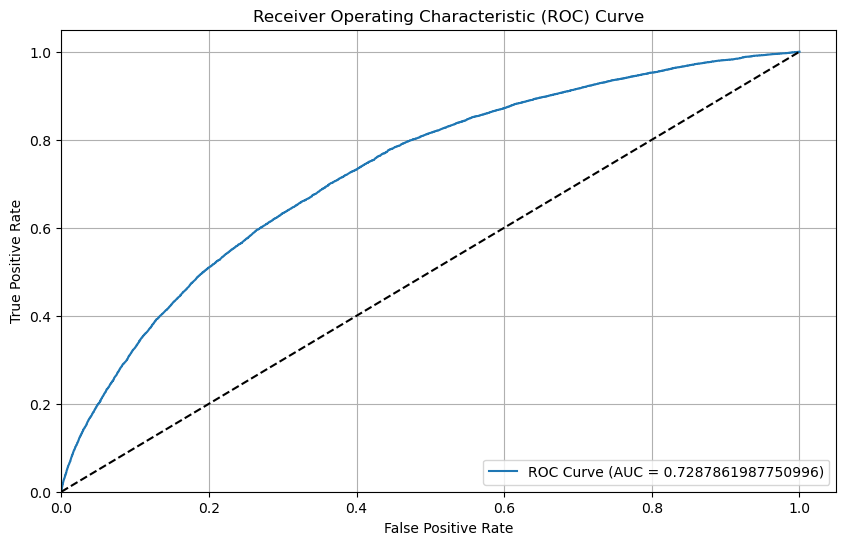

In [120]:
#ROC AUC Visualization

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(final_val_targets, final_val_preds_probability)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {final_roc_auc_val})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

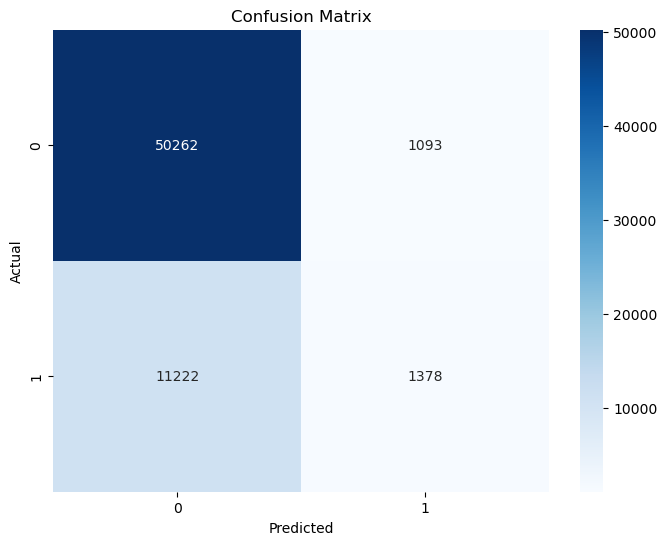

In [121]:
# Confusion Matrix Visualization


# Generate confusion matrix
cm = confusion_matrix(final_val_targets, (final_val_preds_probability > 0.5).astype(int))

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

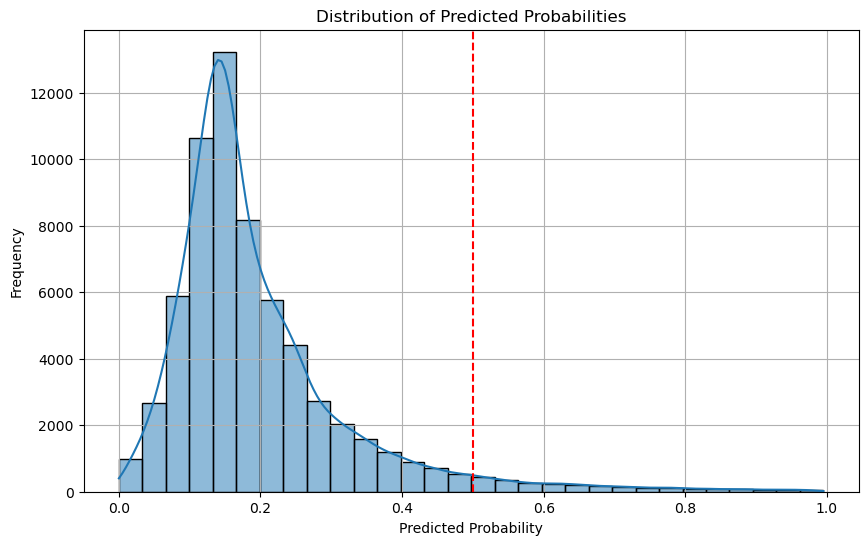

In [122]:
# Predicted probabilities distribution visualization


plt.figure(figsize=(10, 6))
sns.histplot(final_val_preds_probability, bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.grid()
plt.show()

# Making predictions on the Test set

## Download the test set

In [123]:
test_csv_path = extraction_directory + '/verify.csv'
test_df = pd.read_csv(test_csv_path, sep=';')
test_df

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,...,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
0,255821,0,0,0,2268,34,0,1,0,0,0,0,0,0,1,0,1,119,0,6.3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,11000,28000,35000,...,0,0,1,0,0,1,0,49,14,804,0,16.0,261,0.053640,0.354497,7,61,0,1.0,8,0.875,0,1,0,0.0,1,0.0,42.0,0.0,30.0,239.0,0.175732,0,2,0.040816,0,1,1,0.020408,0,1,0,0,0,0.0,6000,1000,4551.0204,12000,0.500000
1,255822,0,0,0,42,49,0,0,1,0,0,0,1,0,0,0,0,265,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,8600,19600,...,0,0,1,0,0,1,1,2,13,22,9,11.0,13,1.000000,0.523810,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,20.0,20.0,20.0,20.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,6000,3400,4700.0000,6000,1.000000
2,255823,0,0,0,265,69,0,1,0,0,0,0,0,1,0,0,1,134,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5000,10000,10000,...,0,0,1,0,0,1,0,3,16,45,14,15.0,16,1.000000,0.169811,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,203.0,17.0,110.0,203.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,3000,3000,4133.3333,6000,0.500000
3,255824,1,0,0,834,25,1,0,1,0,0,0,1,0,0,0,0,34,0,0.3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,10000,40000,50000,...,1,0,1,0,0,1,0,32,37,187,1,5.0,37,1.000000,0.224221,4,15,0,0.0,4,1.000,0,5,0,0.0,4,0.0,15.0,0.0,20.0,185.0,0.081081,0,1,0.031250,0,0,0,0.000000,0,0,0,0,0,0.0,2000,1000,3875.0000,11000,0.181818
4,255825,0,0,0,772,26,1,1,0,0,0,0,0,1,0,0,1,80,1,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,7000,16000,17500,...,0,0,1,0,0,1,0,5,2,120,1,24.0,90,0.022222,0.155440,0,1,0,0.0,1,0.000,0,0,0,0.0,0,1.0,142.0,1.0,163.0,488.0,0.290984,0,0,0.000000,0,1,1,0.200000,0,1,0,0,0,0.0,8000,2000,7640.0000,12000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56025,311846,0,0,0,58,27,0,0,1,0,0,0,0,1,0,0,1,0,0,4.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8000,35000,45000,...,0,0,1,0,0,1,0,5,7,38,1,7.0,22,0.318182,0.655172,1,1,0,0.0,1,1.000,0,0,0,0.0,0,1.0,7.0,3.0,5.0,7.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,3000,2500,3100.0000,4000,0.750000
56026,311847,1,0,0,131,28,0,0,1,0,0,0,1,0,0,0,0,10,2,0.8,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,15000,60000,60000,...,0,1,1,0,0,1,0,4,21,38,2,9.0,21,1.000000,0.290076,2,2,0,0.0,2,1.000,0,0,0,0.0,0,1.0,11.0,11.0,31.0,60.0,0.183333,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,12000,4000,8137.5000,12000,1.000000
56027,311848,0,0,0,199,32,0,0,1,0,0,0,0,1,0,0,1,30,1,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,15000,40000,65000,...,0,0,1,1,0,0,0,10,2,57,0,5.0,24,0.083333,0.286432,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,4.0,0.0,2.0,8.0,0.50000

## Preprocessing the test data

We need to apply same preprocessing steps to a test set

### Imputing Numeric Values

In [124]:
# Before we perform imputation, let's check the no. of missing values in each numeric column.
test_df[true_numeric_columns].isna().sum()

feature_4          0
feature_5          0
feature_17         0
feature_18         0
feature_19         0
feature_47         0
feature_48         0
feature_49         0
feature_50         0
feature_53         0
feature_54         0
feature_55         0
feature_82         0
feature_83         0
feature_84         0
feature_85         0
feature_86         0
feature_87         0
feature_88         0
feature_89         0
feature_90         0
feature_91         0
feature_92         0
feature_93         0
feature_94         0
feature_95         0
feature_96         0
feature_97         0
feature_98         0
feature_99         0
feature_100        0
feature_101        0
feature_102    11459
feature_103    11459
feature_104    11459
feature_105    11459
feature_106    12960
feature_108        0
feature_109        0
feature_110        0
feature_111        0
feature_112        0
feature_113        0
feature_118        0
feature_119        0
feature_120        0
feature_121        0
feature_122  

In [125]:
# Fit the Imputer with mean
imputer.fit(test_df[true_numeric_columns])

SimpleImputer()

In [128]:
# see the results
list(imputer.statistics_)

[876.7219168302695,
 40.82495091915045,
 128.3877387114046,
 0.5131179725147242,
 3.293112618240228,
 9644.144029983938,
 27449.030233803318,
 32492.516098518652,
 43695.09532393361,
 85.89625358647154,
 1039.9999953596289,
 0.12325416557201498,
 14.950883455291809,
 23.34645725504194,
 245.24788506157415,
 10.156112796716044,
 22.968338390148133,
 58.95138318757808,
 0.5627834571032146,
 0.4155116911081586,
 0.37970729966089595,
 5.47415670176691,
 0.02809209352132786,
 0.127003391040514,
 1.454452971622345,
 0.6232354219176786,
 0.23963947885061573,
 5.59953596287703,
 0.06168124219168303,
 0.2349455648759593,
 2.0037836873103694,
 0.5479031610377418,
 76.58019788651814,
 23.755827780395325,
 71.39433712503646,
 280.130264073052,
 0.3777330483283689,
 1.0661966803498126,
 0.0683373157569905,
 0.06896305550597893,
 0.38673924683205424,
 0.38240228449045155,
 0.06556371772828061,
 0.1537747635195431,
 0.03279738132732208,
 8496.420863822952,
 3748.0063001963235,
 6954.35029785829,
 137

In [129]:
# Impute the data in original df with mean
test_df[true_numeric_columns] = imputer.transform(test_df[true_numeric_columns])
# see the results
test_df[true_numeric_columns].isna().sum()

feature_4      0
feature_5      0
feature_17     0
feature_18     0
feature_19     0
feature_47     0
feature_48     0
feature_49     0
feature_50     0
feature_53     0
feature_54     0
feature_55     0
feature_82     0
feature_83     0
feature_84     0
feature_85     0
feature_86     0
feature_87     0
feature_88     0
feature_89     0
feature_90     0
feature_91     0
feature_92     0
feature_93     0
feature_94     0
feature_95     0
feature_96     0
feature_97     0
feature_98     0
feature_99     0
feature_100    0
feature_101    0
feature_102    0
feature_103    0
feature_104    0
feature_105    0
feature_106    0
feature_108    0
feature_109    0
feature_110    0
feature_111    0
feature_112    0
feature_113    0
feature_118    0
feature_119    0
feature_120    0
feature_121    0
feature_122    0
feature_123    0
feature_124    0
dtype: int64

### Scale Numeric Values

In [130]:
data_df[true_numeric_columns].describe()

,feature_4,feature_5,feature_17,feature_18,feature_19,feature_47,feature_48,feature_49,feature_50,feature_53,feature_54,feature_55,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
count,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000
mean,0.241411,0.360206,0.340402,0.063396,0.082271,0.045642,0.405092,0.478210,0.016764,0.000176,0.022207,0.039870,0.160864,0.036119,0.089417,0.014839,0.035272,0.047462,0.534262,0.088361,0.017987,0.022601,0.002558,0.010596,0.051706,0.618092,0.008411,0.013751,0.003221,0.009651,0.019998,0.485240,0.145964,0.228457,0.061843,0.096025,0.894500,0.015755,0.015320,0.013906,0.013577,0.013518,0.064746,0.002999,0.005929,0.063277,0.031632,0.083123,0.113273,0.653930
std,0.222821,0.214907,0.277237,0.096535,0.125258,0.034449,0.183499,0.196787,0.010559,0.007545,0.041603,0.052826,0.196475,0.056426,0.104795,0.036873,0.042429,0.052140,0.388521,0.044429,0.044602,0.044160,0.021197,0.039959,0.075121,0.466044,0.023209,0.025085,0.019194,0.027073,0.030304,0.481404,0.047767,0.027170,0.039721,0.098732,0.005510,0.036931,0.030807,0.047173,0.037399,0.037233,0.189278,0.021355,0.057655,0.083059,0.054934,0.081902,0.101312,0.349217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.052176,0.187500,0.098237,0.000000,0.007500,0.025000,0.245902,0.325203,0.010800,0.000000,0.000000,0.000000,0.021739,0.006821,0.016428,0.001701,0.012520,0.013047,0.150000,0.051269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131369,0.224326,0.048382,0.037213,0.890924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.026424,0.040816,0.322034
50%,0.167195,0.312500,0.259446,0.000000,0.035000,0.035000,0.409836,0.455285,0.016000,0.000000,0.002578,0.013158,0.086957,0.016371,0.051031,0.003401,0.021909,0.029163,0.466667,0.079744,0.000000,0.005495,0.000000,0.000000,0.037037,1.000000,0.000000,0.003676,0.000000,0.000000,0.007634,0.333333,0.134289,0.224799,0.053337,0.068175,0.893365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030612,0.016949,0.055556,0.091837,0.700897
75%,0.388296,0.531250,0.549118,0.125000,0.100000,0.050000,0.491803,0.601626,0.020000,0.000000,0.024492,0.085812,0.239130,0.039563,0.124432,0.011905,0.040689,0.063699,1.000000,0.120197,0.000000,0.027473,0.000000,0.000000,0.074074,1.000000,0.000000,0.016544,0.000000,0.000000,0.022901,1.000000,0.145964,0.227402,0.061843,0.096025,0.896214,0.014925,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091837,0.033898,0.112514,0.153061,1.000000


In [131]:
scaler.fit(test_df[true_numeric_columns])

MinMaxScaler()

In [132]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.0,
 18.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 -13.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -92.0,
 -948.0,
 -8.0,
 0.0,
 -8.85714285714286,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 0.0202020202020202]

In [133]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[3636.0,
 81.0,
 395.0,
 9.0,
 40.0,
 220000.0,
 70000.0,
 70010.0,
 108000.0,
 7405.77565,
 31850.0,
 1.483333,
 93.0,
 196.0,
 2785.0,
 192.0,
 648.0,
 1274.0,
 1.0,
 11.3076923076923,
 24.0,
 222.0,
 23.0,
 23.0,
 27.0,
 1.0,
 10.0,
 283.0,
 9.0,
 23.0,
 126.0,
 1.0,
 3467.0,
 3467.0,
 3467.0,
 3467.0,
 1.0,
 60.0,
 1.33333333333333,
 4.0,
 24.0,
 24.0,
 1.0,
 10.0,
 1.0,
 100000.0,
 55900.0,
 59350.0,
 100000.0,
 1.0]

In [134]:
test_df.loc[:, true_numeric_columns] = scaler.transform(test_df[true_numeric_columns])
test_df

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,...,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
0,255821,0,0,0,0.623762,0.253968,0,1,0,0,0,0,0,0,1,0,1,0.301266,0.000000,0.1575,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.050000,0.400000,0.499929,...,0,0,1,0,0,1,0,0.521739,0.071429,0.288689,0.063415,0.024691,0.204867,0.053640,0.031350,0.291667,0.274775,0.0,0.043478,0.296296,0.875,0.0,0.003534,0.0,0.0,0.007937,0.0,0.037651,0.214723,0.010935,0.068936,0.916379,0,0.033333,0.030612,0.0,0.041667,0.041667,0.020408,0,1,0,0,0.0,0.0,0.050505,0.000000,0.060857,0.111111,0.489691
1,255822,0,0,0,0.011551,0.492063,0,0,1,0,0,0,1,0,0,0,0,0.670886,0.000000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.009091,0.122857,0.279960,...,0,0,1,0,0,1,1,0.010870,0.066327,0.007899,0.107317,0.016975,0.010204,1.000000,0.046323,0.000000,0.000000,0.0,0.000000,0.000000,1.000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.031470,0.219253,0.008058,0.005769,1.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0,0,0.0,0.0,0.050505,0.043716,0.063410,0.050505,1.000000
2,255823,0,0,0,0.072882,0.809524,0,1,0,0,0,0,0,1,0,0,1,0.339241,0.000000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.022727,0.142857,0.142837,...,0,0,1,0,0,1,0,0.021739,0.081633,0.016158,0.131707,0.023148,0.012559,1.000000,0.015017,0.000000,0.000000,0.0,0.000000,0.000000,1.000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.082888,0.218573,0.033957,0.058552,1.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0,0,0.0,0.0,0.020202,0.036430,0.053699,0.050505,0.489691
3,255824,1,0,0,0.229373,0.111111,1,0,1,0,0,0,1,0,0,0,0,0.086076,0.000000,0.0075,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.045455,0.571429,0.714184,...,1,0,1,0,0,1,0,0.336957,0.188776,0.067145,0.068293,0.007716,0.029042,1.000000,0.019829,0.166667,0.067568,0.0,0.000000,0.148148,1.000,0.0,0.017668,0.0,0.0,0.031746,0.0,0.030065,0.214723,0.008058,0.053360,0.906776,0,0.016667,0.023438,0.0,0.000000,0.000000,0.000000,0,0,0,0,0.0,0.0,0.010101,0.000000,0.049272,0.101010,0.164948
4,255825,0,0,0,0.212321,0.126984,1,1,0,0,0,0,0,1,0,0,1,0.202532,0.111111,0.0500,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.031818,0.228571,0.249964,...,0,0,1,0,0,1,0,0.043478,0.010204,0.043088,0.068293,0.037037,0.070644,0.022222,0.013746,0.000000,0.004505,0.0,0.000000,0.037037,0.000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.065749,0.214949,0.049209,0.140756,0.928071,0,0.000000,0.000000,0.0,0.041667,0.041667,0.200000,0,1,0,0,0.0,0.0,0.070707,0.018215,0.113796,0.111111,0.659794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56025,311846,0,0,0,0.015952,0.142857,0,

In [135]:
test_df[true_numeric_columns].describe()

,feature_4,feature_5,feature_17,feature_18,feature_19,feature_47,feature_48,feature_49,feature_50,feature_53,feature_54,feature_55,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
count,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000,56030.000000
mean,0.241123,0.362301,0.325032,0.057013,0.082328,0.043837,0.392129,0.464112,0.404584,0.011599,0.032653,0.083093,0.151640,0.119115,0.088060,0.112957,0.035445,0.046273,0.562783,0.036746,0.015821,0.024658,0.001221,0.005522,0.053869,0.623235,0.023964,0.019786,0.006853,0.010215,0.015903,0.547903,0.047367,0.220103,0.022847,0.080799,0.936871,0.017770,0.051253,0.017241,0.016114,0.015933,0.065564,0.015377,0.032797,0.075721,0.050055,0.102045,0.128722,0.692049
std,0.234547,0.217506,0.282799,0.087044,0.121905,0.033021,0.184989,0.200928,0.186077,0.043651,0.046726,0.073768,0.204694,0.138213,0.110623,0.089958,0.035346,0.049124,0.390802,0.028293,0.043227,0.055998,0.010631,0.020265,0.084585,0.464795,0.073569,0.041206,0.039988,0.032223,0.027947,0.487768,0.062912,0.032499,0.048322,0.110378,0.036796,0.041733,0.103521,0.064483,0.045663,0.044955,0.195463,0.054456,0.137901,0.094943,0.080617,0.099541,0.117080,0.343780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045105,0.190476,0.081013,0.000000,0.007500,0.022727,0.257143,0.314241,0.277778,0.000000,0.000000,0.000000,0.010870,0.030612,0.013645,0.068293,0.013889,0.014129,0.166667,0.012945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027255,0.214723,0.006331,0.014133,0.903623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015152,0.018215,0.036847,0.040404,0.362113
50%,0.158691,0.317460,0.232911,0.000000,0.035000,0.036364,0.357143,0.428510,0.370370,0.000000,0.015699,0.090650,0.054348,0.071429,0.043806,0.078049,0.023148,0.029827,0.528302,0.029754,0.000000,0.004505,0.000000,0.000000,0.037037,1.000000,0.000000,0.003534,0.000000,0.000000,0.007937,1.000000,0.031750,0.215176,0.012950,0.055379,0.936871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040404,0.018215,0.068552,0.090909,0.854197
75%,0.392739,0.523810,0.541772,0.111111,0.100000,0.054545,0.500000,0.571347,0.509259,0.000000,0.047096,0.126061,0.217391,0.153061,0.122083,0.117073,0.044753,0.061224,1.000000,0.056269,0.000000,0.022523,0.000000,0.000000,0.074074,1.000000,0.000000,0.021201,0.000000,0.000000,0.023810,1.000000,0.047367,0.220103,0.022847,0.080799,0.949880,0.016667,0.053571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.057377,0.130047,0.191919,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1

## Make Predictions

In [137]:
test_df

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,...,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
0,255821,0,0,0,0.623762,0.253968,0,1,0,0,0,0,0,0,1,0,1,0.301266,0.000000,0.1575,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.050000,0.400000,0.499929,...,0,0,1,0,0,1,0,0.521739,0.071429,0.288689,0.063415,0.024691,0.204867,0.053640,0.031350,0.291667,0.274775,0.0,0.043478,0.296296,0.875,0.0,0.003534,0.0,0.0,0.007937,0.0,0.037651,0.214723,0.010935,0.068936,0.916379,0,0.033333,0.030612,0.0,0.041667,0.041667,0.020408,0,1,0,0,0.0,0.0,0.050505,0.000000,0.060857,0.111111,0.489691
1,255822,0,0,0,0.011551,0.492063,0,0,1,0,0,0,1,0,0,0,0,0.670886,0.000000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.009091,0.122857,0.279960,...,0,0,1,0,0,1,1,0.010870,0.066327,0.007899,0.107317,0.016975,0.010204,1.000000,0.046323,0.000000,0.000000,0.0,0.000000,0.000000,1.000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.031470,0.219253,0.008058,0.005769,1.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0,0,0.0,0.0,0.050505,0.043716,0.063410,0.050505,1.000000
2,255823,0,0,0,0.072882,0.809524,0,1,0,0,0,0,0,1,0,0,1,0.339241,0.000000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.022727,0.142857,0.142837,...,0,0,1,0,0,1,0,0.021739,0.081633,0.016158,0.131707,0.023148,0.012559,1.000000,0.015017,0.000000,0.000000,0.0,0.000000,0.000000,1.000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.082888,0.218573,0.033957,0.058552,1.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0,0,0.0,0.0,0.020202,0.036430,0.053699,0.050505,0.489691
3,255824,1,0,0,0.229373,0.111111,1,0,1,0,0,0,1,0,0,0,0,0.086076,0.000000,0.0075,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.045455,0.571429,0.714184,...,1,0,1,0,0,1,0,0.336957,0.188776,0.067145,0.068293,0.007716,0.029042,1.000000,0.019829,0.166667,0.067568,0.0,0.000000,0.148148,1.000,0.0,0.017668,0.0,0.0,0.031746,0.0,0.030065,0.214723,0.008058,0.053360,0.906776,0,0.016667,0.023438,0.0,0.000000,0.000000,0.000000,0,0,0,0,0.0,0.0,0.010101,0.000000,0.049272,0.101010,0.164948
4,255825,0,0,0,0.212321,0.126984,1,1,0,0,0,0,0,1,0,0,1,0.202532,0.111111,0.0500,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.031818,0.228571,0.249964,...,0,0,1,0,0,1,0,0.043478,0.010204,0.043088,0.068293,0.037037,0.070644,0.022222,0.013746,0.000000,0.004505,0.0,0.000000,0.037037,0.000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.065749,0.214949,0.049209,0.140756,0.928071,0,0.000000,0.000000,0.0,0.041667,0.041667,0.200000,0,1,0,0,0.0,0.0,0.070707,0.018215,0.113796,0.111111,0.659794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56025,311846,0,0,0,0.015952,0.142857,0,

In [144]:
final_test_df = test_df[best_features].copy()
final_test_df

,feature_55,feature_83,feature_90,feature_91,feature_102,feature_103,feature_109,feature_111,feature_121,feature_122
0,0.000000,0.071429,0.291667,0.274775,0.037651,0.214723,0.030612,0.041667,0.000000,0.060857
1,0.112359,0.066327,0.000000,0.000000,0.031470,0.219253,0.000000,0.000000,0.043716,0.063410
2,0.000000,0.081633,0.000000,0.000000,0.082888,0.218573,0.000000,0.000000,0.036430,0.053699
3,0.000000,0.188776,0.166667,0.067568,0.030065,0.214723,0.023438,0.000000,0.000000,0.049272
4,0.101124,0.010204,0.000000,0.004505,0.065749,0.214949,0.000000,0.041667,0.018215,0.113796
...,...,...,...,...,...,...,...,...,...,...
56025,0.101124,0.035714,0.041667,0.004505,0.027817,0.215402,0.000000,0.000000,0.027322,0.035990
56026,0.002482,0.107143,0.083333,0.009009,0.028941,0.217214,0.000000,0.000000,0.054645,0.122322
56027,0.000000,0.010204,0.000000,0.000000,0.026974,0.214723,0.150000,0.000000,0.528233,0.507626
56028,0.112359,0.030612,0.000000,0.076577,0.032874,0.215855,0.000000,0.000000,0.000000,0.034398


In [155]:
final_test_probability = final_model.predict_proba(final_test_df)[:, 1]
len(final_test_probability)

56030

In [156]:
final_test_probability

array([0.00703063, 0.22610657, 0.20607538, ..., 0.23190051, 0.09472638,
       0.16464671])

## Save the results

In [157]:
submission_df = pd.read_csv(test_csv_path, sep=';')
submission_df

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,...,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
0,255821,0,0,0,2268,34,0,1,0,0,0,0,0,0,1,0,1,119,0,6.3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,11000,28000,35000,...,0,0,1,0,0,1,0,49,14,804,0,16.0,261,0.053640,0.354497,7,61,0,1.0,8,0.875,0,1,0,0.0,1,0.0,42.0,0.0,30.0,239.0,0.175732,0,2,0.040816,0,1,1,0.020408,0,1,0,0,0,0.0,6000,1000,4551.0204,12000,0.500000
1,255822,0,0,0,42,49,0,0,1,0,0,0,1,0,0,0,0,265,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,8600,19600,...,0,0,1,0,0,1,1,2,13,22,9,11.0,13,1.000000,0.523810,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,20.0,20.0,20.0,20.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,6000,3400,4700.0000,6000,1.000000
2,255823,0,0,0,265,69,0,1,0,0,0,0,0,1,0,0,1,134,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5000,10000,10000,...,0,0,1,0,0,1,0,3,16,45,14,15.0,16,1.000000,0.169811,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,203.0,17.0,110.0,203.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,3000,3000,4133.3333,6000,0.500000
3,255824,1,0,0,834,25,1,0,1,0,0,0,1,0,0,0,0,34,0,0.3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,10000,40000,50000,...,1,0,1,0,0,1,0,32,37,187,1,5.0,37,1.000000,0.224221,4,15,0,0.0,4,1.000,0,5,0,0.0,4,0.0,15.0,0.0,20.0,185.0,0.081081,0,1,0.031250,0,0,0,0.000000,0,0,0,0,0,0.0,2000,1000,3875.0000,11000,0.181818
4,255825,0,0,0,772,26,1,1,0,0,0,0,0,1,0,0,1,80,1,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,7000,16000,17500,...,0,0,1,0,0,1,0,5,2,120,1,24.0,90,0.022222,0.155440,0,1,0,0.0,1,0.000,0,0,0,0.0,0,1.0,142.0,1.0,163.0,488.0,0.290984,0,0,0.000000,0,1,1,0.200000,0,1,0,0,0,0.0,8000,2000,7640.0000,12000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56025,311846,0,0,0,58,27,0,0,1,0,0,0,0,1,0,0,1,0,0,4.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8000,35000,45000,...,0,0,1,0,0,1,0,5,7,38,1,7.0,22,0.318182,0.655172,1,1,0,0.0,1,1.000,0,0,0,0.0,0,1.0,7.0,3.0,5.0,7.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,3000,2500,3100.0000,4000,0.750000
56026,311847,1,0,0,131,28,0,0,1,0,0,0,1,0,0,0,0,10,2,0.8,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,15000,60000,60000,...,0,1,1,0,0,1,0,4,21,38,2,9.0,21,1.000000,0.290076,2,2,0,0.0,2,1.000,0,0,0,0.0,0,1.0,11.0,11.0,31.0,60.0,0.183333,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,12000,4000,8137.5000,12000,1.000000
56027,311848,0,0,0,199,32,0,0,1,0,0,0,0,1,0,0,1,30,1,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,15000,40000,65000,...,0,0,1,1,0,0,0,10,2,57,0,5.0,24,0.083333,0.286432,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,4.0,0.0,2.0,8.0,0.50000

In [159]:
submission_df_cleaned = pd.DataFrame({
    'ID': submission_df['ID'],  # Assuming your submission file has an 'ID' column
    'target': final_test_probability   # Your predictions
})

submission_df_cleaned

,ID,target
0,255821,0.007031
1,255822,0.226107
2,255823,0.206075
3,255824,0.115326
4,255825,0.142531
...,...,...
56025,311846,0.151617
56026,311847,0.135312
56027,311848,0.231901
56028,311849,0.094726


In [160]:
submission_df_cleaned.to_csv('reuslt.csv', index=False)

## Groupping results

In [163]:
bins = pd.IntervalIndex.from_tuples([(i / 10, (i + 1) / 10) for i in range(10)])
submission_df_cleaned['probability_bins'] = pd.cut(submission_df_cleaned['target'], bins)

grouped_stats = submission_df_cleaned.groupby('probability_bins', observed=True).agg(
    total_objects=('target', 'size'),  # Total objects in the group
    objects_with_target_1=('target', lambda x: (x >= 0.5).sum())  # Count objects with target = 1 (probability >= 0.5)
).reset_index()

grouped_stats

,probability_bins,total_objects,objects_with_target_1
0,"(0.0, 0.1]",13634,0
1,"(0.1, 0.2]",15965,0
2,"(0.2, 0.3]",9062,0
3,"(0.3, 0.4]",5002,0
4,"(0.4, 0.5]",3207,0
5,"(0.5, 0.6]",2335,2335
6,"(0.6, 0.7]",1815,1815
7,"(0.7, 0.8]",1562,1562
8,"(0.8, 0.9]",1518,1518
9,"(0.9, 1.0]",1930,1930
